# From Localhost to Public Server: Understanding IP, Ports, and Scalable Deployment



## Introduction

When building a web application locally, developers typically work on `localhost` (or `127.0.0.1`) using a development server like FastAPI, Django, or Node.js. However, deploying an application for public access requires a deeper understanding of how servers, ports, IP addresses, and scaling strategies work.

This article walks you through the transition from local development to a production-ready deployment, including advanced techniques to manage IPs, ports, and scale multiple services efficiently.

---

## 1. What is Localhost (127.0.0.1)?

### Localhost Defined

* `127.0.0.1` is a loopback IP address.
* It refers to the current machine only.
* Used during development, it is **not accessible from the outside world**.

### Example:

```bash
http://127.0.0.1:8000
```

This opens your app locally in your browser, but no one else can access it.

---

## 2. What is a Public Server?

### Public Server Defined

* A **machine with a public IP address**, accessible from anywhere via the internet.
* Hosts your application so it can be reached by users.

### Example:

```bash
http://51.23.100.10:8000
```

This IP and port can be accessed publicly as long as:

* Your app binds to `0.0.0.0`
* The firewall allows access
* The port is open

### Key Difference:

| Feature       | Localhost (127.0.0.1) | Public IP (e.g., 51.23.100.10) |
| ------------- | --------------------- | ------------------------------ |
| Accessibility | Local only            | Global/internet                |
| Usage         | Development           | Production                     |

---

## 3. Binding to `127.0.0.1` vs `0.0.0.0`

### What They Mean:

* `127.0.0.1`: Listens only for connections on your machine.
* `0.0.0.0`: Listens on **all network interfaces**, including public IPs.

### Example with FastAPI:

```bash
uvicorn main:app --host 0.0.0.0 --port 8000
```

This allows the app to be reachable from outside your machine.

---

## 4. What Happens If Multiple Apps Use the Same Port?

Each process on a system can only bind to a unique `<IP>:<Port>` pair.

### Rules:

* ✅ Valid: Same port, **different IPs**
* ❌ Invalid: Same port, **same IP**

| App | IP           | Port | Status           |
| --- | ------------ | ---- | ---------------- |
| A   | 51.23.100.10 | 8000 | ✅                |
| B   | 51.23.100.10 | 8000 | ❌     (conflict) |
| C   | 51.23.100.11 | 8000 | ✅                |

---

## 5. What If All IPs and Ports Are Used?

You may be tempted to ask: "Can I just keep adding IPs or using new ports?"

While technically possible, this approach is **not scalable**.

Instead, production systems use strategies like:

### ✅ 1. Reverse Proxy with NGINX or Traefik

Use one IP and one port (e.g., port 80) and route traffic to multiple apps:

```nginx
server {
  listen 80;
  server_name api1.example.com;
  location / {
    proxy_pass http://127.0.0.1:8000;
  }
}
```

* Apps run on internal ports (8000, 8001, etc.)
* NGINX exposes just one public endpoint

### ✅ 2. Docker and Internal Ports

Run multiple apps in containers with the same internal port:

```bash
docker run -p 8001:8000 app1
docker run -p 8002:8000 app2
```

Even better, use Docker + NGINX to reverse-proxy them all via one IP:80.

### ✅ 3. Unix Domain Sockets

Bypass ports completely using local socket files:

```bash
uvicorn app:app --uds /tmp/app1.sock
```

Faster and more scalable for same-host apps. NGINX supports this.

### ✅ 4. Path or Domain-based Routing

Route by domain:

```nginx
server_name api1.example.com → http://127.0.0.1:8000
server_name api2.example.com → http://127.0.0.1:8001
```

Or route by path:

```nginx
location /api1 → app1
location /api2 → app2
```

### ✅ 5. One App, Many Sub-Apps (FastAPI Routers)

If apps are related, you can mount them:

```python
main_app.mount("/admin", admin_app)
main_app.mount("/auth", auth_app)
```

Run on a single IP\:port.

---

## 6. Scaling: Do Not Rely on IPs and Ports Alone

Instead of consuming all IPs or ports:

* Use **NGINX reverse proxy**
* Route via **subdomains or paths**
* Use **Unix sockets** or **Docker**

This is how cloud platforms like AWS, Heroku, and Vercel host thousands of apps with a limited number of IPs.

---

## Final Summary

| Technique                | Public IP Used? | Port Used? | Scalable? | Notes                 |
| ------------------------ | --------------- | ---------- | --------- | --------------------- |
| Direct IP\:Port per app  | ✅               | ✅          | ❌         | Very limited          |
| NGINX Reverse Proxy      | ✅               | ✅ (1 only) | ✅         | Most common           |
| Docker + Reverse Proxy   | ✅               | ✅ (1 only) | ✅         | Isolated apps         |
| Unix Domain Sockets      | ❌               | ❌          | ✅         | Very efficient        |
| FastAPI Sub-app Mounting | ✅               | ✅ (1 only) | ☑️        | Only for related apps |

---

## What to Learn Next

* "How NGINX reverse proxy works"
* "Docker + FastAPI deployment"
* "Unix sockets in web servers"
* "Multi-app deployment on one server"
* "Domain routing with NGINX"

---

Want a step-by-step tutorial to deploy two FastAPI apps behind NGINX on the same server using one public IP? Let me know!


# 🔐 Designing a Microservice with FastAPI + Firebase Authentication (Streaming-Oriented)



## 📌 Use Case

You want to build a **microservice** that:

* Is built using **FastAPI**
* Has its own **custom database**
* Supports **modular streaming features** (e.g., video, chat, live data)
* Authenticates users via **Firebase (frontend login)**
* Provides APIs or WebSockets for a **frontend app** (like React or Flutter)

---

## 🧱 Microservice Design Overview

### ✅ Core Architecture

| Layer             | Technology                                                  |
| ----------------- | ----------------------------------------------------------- |
| Backend           | FastAPI                                                     |
| Database          | PostgreSQL / SQLite + SQLAlchemy                            |
| Authentication    | Firebase Auth (client-side login, server-side verification) |
| Realtime Feature  | WebSocket + asyncio                                         |
| DevOps (optional) | Docker + NGINX                                              |

---

## 📁 Folder Structure (Professional)

```bash
streaming_service/
├── app/
│   ├── main.py
│   ├── api/v1/
│   │   ├── users.py
│   │   ├── streaming.py
│   ├── core/
│   │   ├── config.py         # Pydantic settings
│   │   └── firebase.py       # Firebase admin
│   ├── db/
│   │   ├── session.py
│   │   ├── models/
│   │   │   └── user.py
│   ├── schemas/
│   │   └── user.py
│   ├── services/
│   │   └── stream.py
│   ├── sockets/
│   │   └── streaming.py
│   └── utils/
│       └── logger.py
├── .env
├── requirements.txt
└── serviceAccountKey.json  # Firebase admin key
```

---

## 🔐 Firebase Authentication + FastAPI

### 1. Frontend (React, Flutter, etc.)

* User logs in via Firebase (email/password, Google, etc.)
* Firebase returns an **ID Token** (JWT)
* Token is stored in local storage and sent in headers:

```http
Authorization: Bearer <FIREBASE_ID_TOKEN>
```

---

### 2. Backend (FastAPI): Verify the Token

#### Install Firebase Admin SDK

```bash
pip install firebase-admin
```

#### `firebase.py` (initialize Firebase)

```python
from firebase_admin import credentials, auth, initialize_app

cred = credentials.Certificate("serviceAccountKey.json")
initialize_app(cred)
```

---

#### Token Verification in Dependency

```python
from fastapi import Request, HTTPException, status
from firebase_admin import auth

def get_current_user(request: Request):
    auth_header = request.headers.get("Authorization")
    if not auth_header or not auth_header.startswith("Bearer "):
        raise HTTPException(status_code=status.HTTP_401_UNAUTHORIZED, detail="Missing token")
    
    token = auth_header.split(" ")[1]
    
    try:
        decoded_token = auth.verify_id_token(token)
        return decoded_token  # You can extract UID, email, etc.
    except Exception:
        raise HTTPException(status_code=status.HTTP_401_UNAUTHORIZED, detail="Invalid token")
```

---

### 3. Protect Routes

```python
from fastapi import APIRouter, Depends
from app.core.firebase import get_current_user

router = APIRouter()

@router.get("/profile")
def get_profile(user=Depends(get_current_user)):
    return {"uid": user["uid"], "email": user.get("email")}
```

---

## 🧠 Handling Overlaps Between Firebase and FastAPI

| Concern                          | Solution                                    |
| -------------------------------- | ------------------------------------------- |
| Auth already handled in frontend | ✅ Just **verify token** on backend          |
| Need custom roles                | ✅ Add **custom claims** in Firebase         |
| Need backend user records        | ✅ On first token verification, create in DB |
| WebSocket security               | ✅ Send token in handshake or query param    |

---

### Set Custom Claims in Firebase (Optional)

In Firebase Admin SDK (Node.js or Python):

```js
admin.auth().setCustomUserClaims(uid, { admin: true });
```

Then in FastAPI:

```python
if decoded_token.get("admin"):
    # Allow special access
```

---

## 🔌 WebSocket Streaming (Simplified)

```python
from fastapi import APIRouter, WebSocket, WebSocketDisconnect

router = APIRouter()
active_users = []

@router.websocket("/ws/stream")
async def stream_socket(websocket: WebSocket):
    await websocket.accept()
    active_users.append(websocket)
    try:
        while True:
            data = await websocket.receive_text()
            for user in active_users:
                await user.send_text(data)
    except WebSocketDisconnect:
        active_users.remove(websocket)
```

> ✅ Secure this WebSocket by sending the Firebase token in the `query` or `headers`, then verify it similarly.

---

## ✅ Summary: Who Does What?

| Feature               | Handled By                           |
| --------------------- | ------------------------------------ |
| Login / Signup        | Firebase (frontend)                  |
| Token generation      | Firebase (frontend)                  |
| Token verification    | FastAPI (backend)                    |
| Authorization / RBAC  | FastAPI (backend)                    |
| Streaming / WebSocket | FastAPI (backend)                    |
| Role management       | Firebase (admin SDK + custom claims) |

---

## 📌 Final Tips

* Only **verify** tokens in FastAPI, no need to handle passwords.
* Use **custom claims** for admin/role-based access.
* On first-time login, create a user in your database using the Firebase UID.
* Consider reverse proxy (NGINX) and HTTPS in production.

---

## 📜 Further Reading

* [Firebase Admin SDK (Python)](https://firebase.google.com/docs/admin/setup)
* [FastAPI WebSocket Docs](https://fastapi.tiangolo.com/advanced/websockets/)
* [JWT Authentication Patterns](https://jwt.io/introduction/)


# 🔄 Relationship Between Nginx, Any Deployment Method, PostgreSQL, and FastAPI

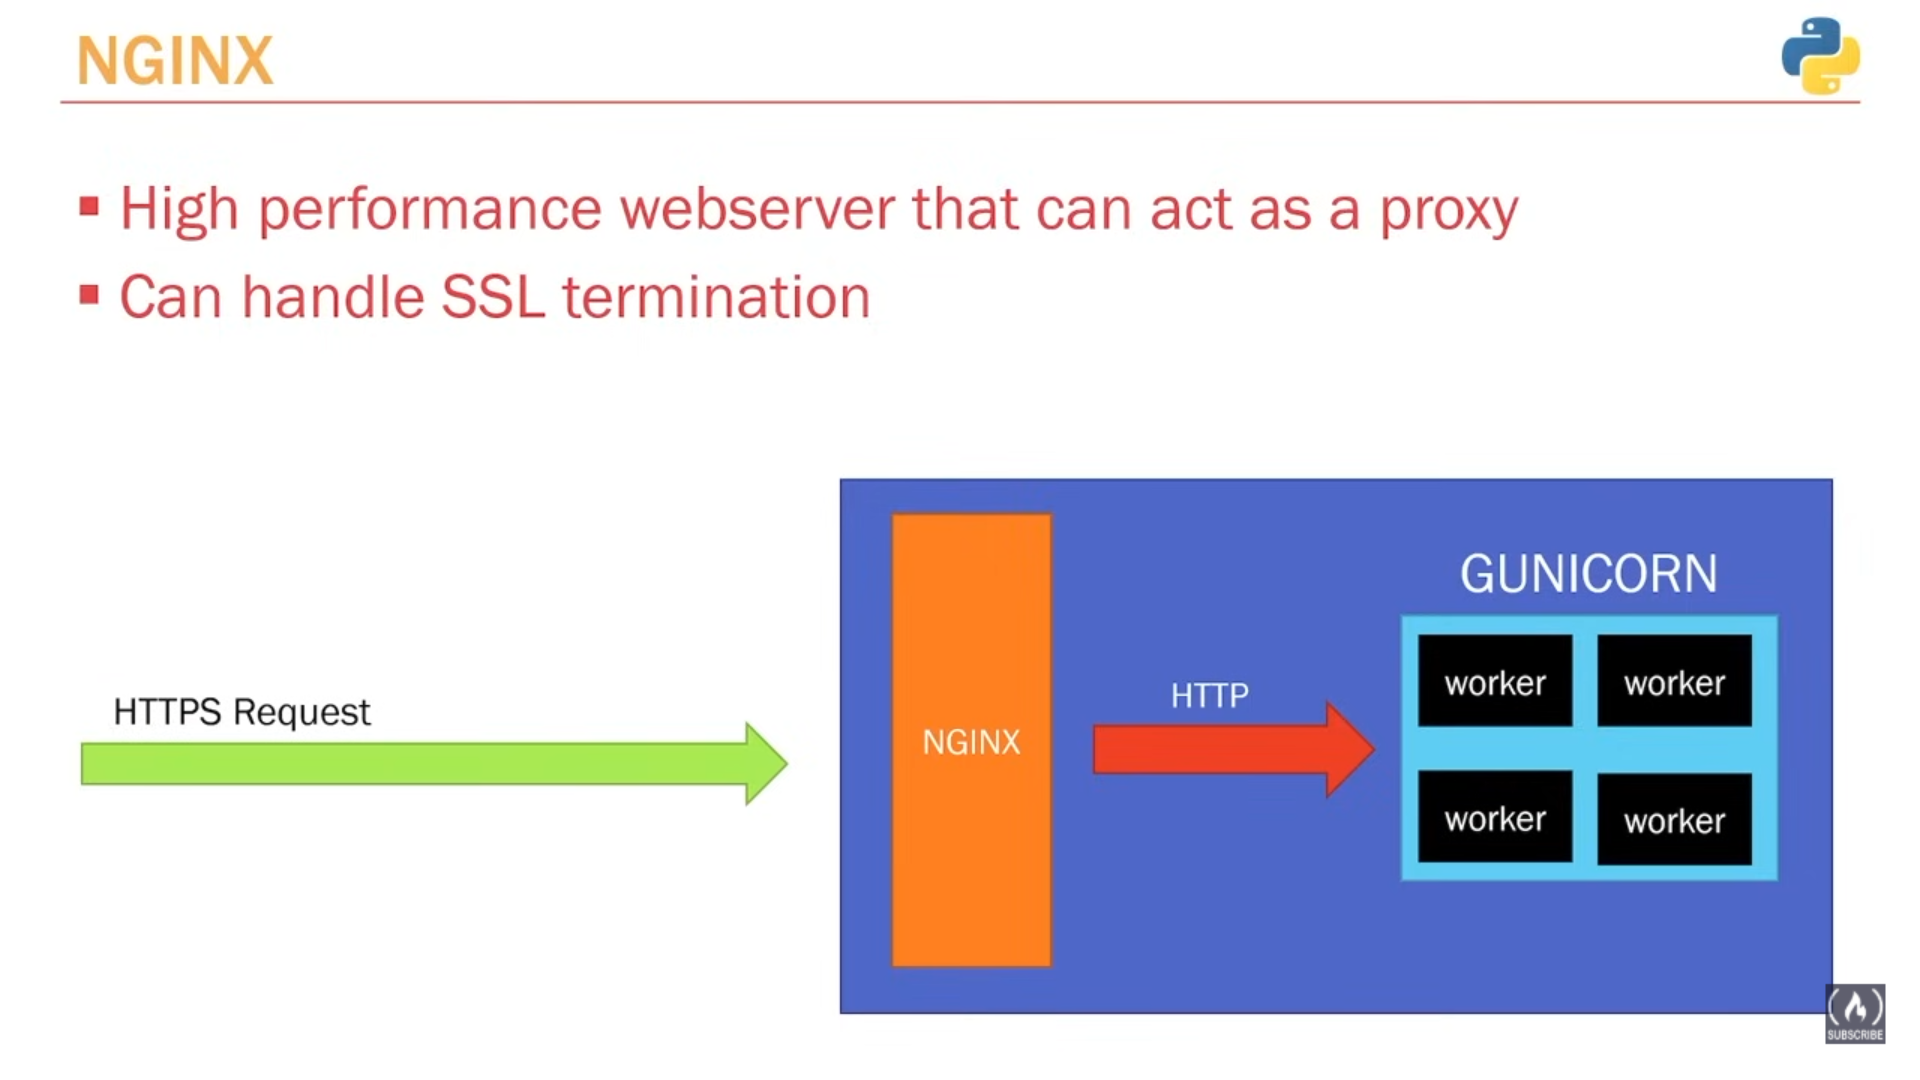



## 📌 Overview

This guide explores how **Nginx**, **FastAPI**, **PostgreSQL**, and any **deployment method** (like Heroku, Docker, bare metal) work together to build scalable and reliable backend systems.

---

## 🧠 Component Roles

| Component             | Role                                                        |
| --------------------- | ----------------------------------------------------------- |
| **FastAPI**           | The main web application framework (backend logic, APIs)    |
| **PostgreSQL**        | The database (stores data: users, sessions, content)        |
| **Nginx**             | Reverse proxy (handles HTTPS, load balancing, static files) |
| **Deployment Method** | Environment where app is hosted (Heroku, Docker, etc.)      |

---

## 🧭 How They Work Together

### 🔹 1. FastAPI

* Defines your API endpoints (REST/WebSocket)
* Uses `uvicorn` or `gunicorn + uvicorn worker` in production

### 🔹 2. PostgreSQL

* Interacts with FastAPI via ORM (e.g., SQLAlchemy or Tortoise)
* Stores persistent data (auth, products, settings)

### 🔹 3. Nginx

* Sits in front of FastAPI app
* Handles:

  * SSL termination (HTTPS)
  * Routing to FastAPI via `proxy_pass`
  * Static file serving (docs, images)
  * Rate limiting & caching

### 🔹 4. Deployment Method

Depending on where you deploy:

* **Heroku**: You may not use Nginx directly; Heroku provides its own routing layer.
* **Docker**: You define a container for FastAPI and optionally for Nginx/PostgreSQL.
* **Bare Metal/VPS**: You manually install Nginx, FastAPI (as a service), and PostgreSQL.

---

## 🧱 Sample Architecture

```plaintext
┌─────────────┐
│  Browser    │
└────┬────────┘
     │ HTTPS
┌────▼──────┐
│   Nginx   │
└────┬──────┘
     │ HTTP
┌────▼────────────┐     ┌───────────────────┐
│ FastAPI (Uvicorn)│◄───▶ PostgreSQL DB     │
└──────────────────┘     └───────────────────┘
```

---

## 🔧 When to Use Nginx

| Use Case                      | Nginx?              |
| ----------------------------- | ------------------- |
| Bare metal deployment         | ✅                   |
| Docker with multiple services | ✅                   |
| Heroku/Railway (managed)      | ❌ (Handled for you) |
| Serve static files            | ✅                   |
| SSL/HTTPS termination         | ✅                   |

---

## 🧰 Example: Docker + Nginx + FastAPI + PostgreSQL

**Docker Compose Example:**

```yaml
version: '3.8'
services:
  nginx:
    image: nginx:latest
    ports:
      - "80:80"
    volumes:
      - ./nginx.conf:/etc/nginx/nginx.conf
    depends_on:
      - fastapi

  fastapi:
    build: .
    command: gunicorn app.main:app -k uvicorn.workers.UvicornWorker --bind 0.0.0.0:8000
    expose:
      - "8000"
    env_file:
      - .env

  postgres:
    image: postgres:15
    environment:
      POSTGRES_USER: user
      POSTGRES_PASSWORD: pass
      POSTGRES_DB: app_db
    volumes:
      - pgdata:/var/lib/postgresql/data

volumes:
  pgdata:
```

---

## 🚀 Deployment Types Compared

### 1. **Docker (Self-managed, Local or Cloud)**

* Run FastAPI + PostgreSQL in isolated containers
* Use `docker-compose` to manage multi-container setup
* Use Nginx as a reverse proxy

✅ Best for:

* Full control over stack
* Local dev and production parity

⚠️ Requires:

* DevOps knowledge, infrastructure setup

---

### 2. **Firebase Hosting (with Cloud Functions)**

* FastAPI cannot run natively
* Instead, deploy frontend to Firebase
* Use Firebase Functions to proxy to FastAPI API
* Backend FastAPI must be hosted elsewhere (e.g., Render, Railway)

✅ Best for:

* Frontend-first apps with Firebase Auth, DB

⚠️ Backend must be hosted separately

---

### 3. **Heroku**

* One of the easiest platforms to deploy Python apps
* Buildpacks auto-detect FastAPI (with `gunicorn`)
* Add `Procfile`, `requirements.txt`, `runtime.txt`

✅ Best for:

* Rapid prototyping
* Solo/small apps with free tiers

⚠️ Limited scaling, free dyno sleeping, no root access

---

### 4. **DigitalOcean (Droplets / App Platform)**

* Use Droplets (VPS) for full control + Nginx
* Or use App Platform (PaaS) for simpler deploy
* Manual setup for PostgreSQL or managed DBs

✅ Best for:

* Mid-sized teams
* More control at lower cost

⚠️ Requires server maintenance

---

### 5. **AWS (EC2 / ECS / Elastic Beanstalk)**

* Multiple deployment methods:

  * **EC2** (VM): Manual control with Nginx, Docker
  * **ECS / Fargate**: Managed containers
  * **Elastic Beanstalk**: Simplified PaaS
* Use RDS for PostgreSQL

✅ Best for:

* Enterprise-grade, scalable apps

⚠️ Complex configuration, billing, IAM setup

---

## ✅ Summary

| Tech             | Use For                             | Notes                                   |
| ---------------- | ----------------------------------- | --------------------------------------- |
| **FastAPI**      | Backend logic + APIs                | Use with Uvicorn or Gunicorn            |
| **PostgreSQL**   | Persistent data                     | Use ORM like SQLAlchemy                 |
| **Nginx**        | Reverse proxy, HTTPS, static assets | Optional on PaaS (Heroku), vital on VPS |
| **Docker**       | Local + cloud deploy w/ containers  | Great for reproducibility + scaling     |
| **Firebase**     | Frontend + static hosting           | Pair with remote FastAPI backend        |
| **Heroku**       | Simple deploy for small apps        | Free tier great for testing             |
| **DigitalOcean** | Mid-size deploy, affordable VPS     | App Platform or full control            |
| **AWS**          | Scalable, enterprise deployments    | High complexity, global infra           |


* FastAPI runs your Python backend app
* PostgreSQL stores your persistent data
* Nginx forwards HTTPS traffic to FastAPI, handles static assets
* Deployment method determines the environment (Docker, Heroku, VPS, etc.)

Together, they form a modern, production-ready backend architecture.

Want a live example repo, deployment tutorial, or Dockerized template? Just ask!


# 🔐 Certbot and Let's Encrypt: The Complete Guide to Free HTTPS



## Introduction

In today's web, having a secure connection via HTTPS is no longer optional—it's a necessity. Browsers like Chrome and Firefox now warn users when visiting sites without encryption. But how do you easily and affordably set up HTTPS?

Enter **Certbot** and **Let's Encrypt**—a free and automated way to get SSL/TLS certificates for your domain.

This article covers everything you need to know about Certbot, including:

* What Certbot and Let's Encrypt are
* How HTTPS and SSL certificates work
* Installing Certbot
* Getting a free HTTPS certificate
* Automatically renewing your certificate
* Integrating with NGINX, Apache, and Docker

---

## 🌐 What is HTTPS?

HTTPS (HyperText Transfer Protocol Secure) encrypts data sent between your browser and the server, preventing eavesdropping and tampering.

This is done using an **SSL/TLS certificate**, issued by a **Certificate Authority (CA)**.

### Why HTTPS matters:

* Protects user data
* Builds trust (no browser warnings)
* Required for modern web APIs (like PWAs, location, push notifications)

---

## ✅ What Is Let's Encrypt?

[Let's Encrypt](https://letsencrypt.org/) is a **Certificate Authority (CA)** that issues **free, automated, and trusted** SSL/TLS certificates.

It uses the **ACME protocol** to validate domain ownership and provide certificates.

---

## 🛠️ What Is Certbot?

**Certbot** is a command-line tool developed by the EFF that interacts with Let's Encrypt to:

* Request certificates
* Prove ownership of your domain
* Install certificates on your server (optional)
* Automatically renew certificates

It supports common servers like:

* NGINX
* Apache
* Standalone (for custom setups)

---

## ⚙️ How Certbot Works (Simplified)

1. You run `certbot` with your domain.
2. Certbot asks Let's Encrypt for a certificate.
3. Let's Encrypt gives you a **challenge** to prove domain ownership.
4. Certbot solves the challenge (via HTTP, DNS, or standalone server).
5. Let's Encrypt issues your certificate.
6. Certbot optionally installs and renews it.

---

## 🚀 Installing Certbot

### Ubuntu (NGINX example):

```bash
sudo apt update
sudo apt install certbot python3-certbot-nginx
```

### RHEL/CentOS:

```bash
sudo dnf install certbot python3-certbot-nginx
```

---

## 🔒 Obtaining and Installing an HTTPS Certificate

### For NGINX:

```bash
sudo certbot --nginx -d example.com -d www.example.com
```

Certbot will:

* Automatically configure your NGINX server block
* Install the certificate
* Redirect HTTP to HTTPS (optional)

### For Apache:

```bash
sudo certbot --apache -d example.com
```

### For Standalone (no NGINX/Apache):

```bash
sudo certbot certonly --standalone -d example.com
```

You must stop any other service using port 80 temporarily.

---

## 🔁 Automatic Certificate Renewal

Let's Encrypt certs last only **90 days**. Certbot sets up automatic renewal with:

### Cron:

```bash
0 */12 * * * certbot renew --quiet
```

### Or Systemd:

```bash
sudo systemctl list-timers | grep certbot
```

You can test renewal manually:

```bash
sudo certbot renew --dry-run
```

---

## 🔌 Certbot Plugins (Modes)

| Plugin         | Use Case                              |
| -------------- | ------------------------------------- |
| `--nginx`      | Auto-configure SSL in NGINX           |
| `--apache`     | Auto-configure SSL in Apache          |
| `--standalone` | Runs its own web server briefly       |
| `--manual`     | You handle DNS or HTTP manually       |
| `--dns-*`      | Automated DNS verification (advanced) |

---

## 🔍 Useful Certbot Commands

| Command                | Purpose                      |
| ---------------------- | ---------------------------- |
| `certbot certificates` | List all active certs        |
| `certbot delete`       | Remove a certificate         |
| `certbot renew`        | Renew all certificates       |
| `certbot --dry-run`    | Test renewal without changes |
| `certbot --help`       | See all options              |

---

## 🐳 Using Certbot in Docker

You can run Certbot inside Docker for containerized apps:

```bash
docker run -it --rm \
  -v "/etc/letsencrypt:/etc/letsencrypt" \
  -v "/var/lib/letsencrypt:/var/lib/letsencrypt" \
  -v "/var/log/letsencrypt:/var/log/letsencrypt" \
  certbot/certbot certonly --standalone -d example.com
```

---

## 💡 Best Practices

| Tip                            | Why It Matters                    |
| ------------------------------ | --------------------------------- |
| Use wildcard certs (if needed) | Covers `*.example.com` subdomains |
| Use DNS plugin for CI/CD       | Automate certs without downtime   |
| Use `certbot --dry-run` often  | Avoid renewal failures            |
| Always redirect HTTP → HTTPS   | Avoid insecure access             |

---

## 📌 Summary

* **Certbot** is the easiest way to enable HTTPS with **Let's Encrypt**.
* It’s **free**, **secure**, and **automated**.
* You can use it with NGINX, Apache, or even Docker.
* Certificates renew every 90 days, but **auto-renewal is built in**.

---

## 📚 Learn More

* [https://letsencrypt.org](https://letsencrypt.org)
* [https://certbot.eff.org](https://certbot.eff.org)
* [https://nginx.org/en/docs/http/configuring\_https\_servers.html](https://nginx.org/en/docs/http/configuring_https_servers.html)

Let me know if you want a tutorial to deploy FastAPI with NGINX and Certbot on Ubuntu!


# 🔥 Firewall Configuration for Web Server Security (with UFW on Ubuntu)



## Introduction

When deploying a web application to a public server (e.g., FastAPI, Flask, Django, Node.js), one of the most critical steps is to configure the **firewall** correctly. The firewall ensures that only essential ports are open to the internet, keeping your system secure while allowing legitimate access.

This article provides a complete guide to:

* Understanding what a firewall is
* Choosing the right tool (we'll use `ufw` on Ubuntu)
* Allowing necessary ports like 22 (SSH), 80 (HTTP), 443 (HTTPS), and 8000 (FastAPI dev)
* Testing and managing firewall rules
* Best practices for production security

---

## 🛡️ What Is a Firewall?

A **firewall** is a security system that monitors and controls incoming and outgoing network traffic. It acts as a gatekeeper for your server.

By default, a strict firewall blocks all incoming traffic unless you explicitly allow it.

---

## 🚀 Installing and Using UFW (Uncomplicated Firewall)

UFW is a user-friendly wrapper around iptables.

### Step 1: Install UFW

Most Ubuntu systems have it pre-installed. If not:

```bash
sudo apt update
sudo apt install ufw -y
```

### Step 2: Check Current Status

```bash
sudo ufw status verbose
```

You may see:

```
Status: inactive
```

---

## ✅ Allow Essential Ports Before Enabling

### Allow SSH (Port 22) — to avoid getting locked out

```bash
sudo ufw allow 22
```

### Allow HTTP (Port 80) — for web traffic

```bash
sudo ufw allow 80
```

### Allow HTTPS (Port 443) — for secure traffic

```bash
sudo ufw allow 443
```

### (Optional) Allow FastAPI dev server (Port 8000)

If you are running an app with:

```bash
uvicorn app:app --host 0.0.0.0 --port 8000
```

Allow it:

```bash
sudo ufw allow 8000
```

---

## 🔐 Enable the Firewall

Once the required ports are allowed:

```bash
sudo ufw enable
```

Output:

```
Command may disrupt existing ssh connections. Proceed with operation (y|n)? y
Firewall is active and enabled on system startup
```

### Re-check status:

```bash
sudo ufw status numbered
```

Example output:

```
Status: active
To                         Action      From
--                         ------      ----
22                         ALLOW       Anywhere
80                         ALLOW       Anywhere
443                        ALLOW       Anywhere
8000                       ALLOW       Anywhere
```

---

## 🧰 Managing Rules

### Deny a port

```bash
sudo ufw deny 3306       # Deny MySQL port
```

### Delete a rule (by number)

```bash
sudo ufw status numbered
sudo ufw delete <rule_number>
```

### Reset all rules

```bash
sudo ufw reset
```

---

## 🧪 Testing Open Ports

### From the server itself:

```bash
sudo lsof -i -P -n | grep LISTEN
```

### From another machine (requires nmap):

```bash
nmap <your-server-ip>
```

---

## 🔐 Best Practices for Firewall Configuration

| Practice                     | Why Important                   |
| ---------------------------- | ------------------------------- |
| ✅ Allow only necessary ports | Minimizes attack surface        |
| ✅ Enable SSH before firewall | Avoids locking yourself out     |
| ✅ Use numbered rules         | Easy management                 |
| ✅ Enable logging (if needed) | Track suspicious traffic        |
| ✅ Combine with Fail2Ban      | Prevent brute-force SSH attacks |

---

## 🧾 Summary: UFW Commands Cheat Sheet

| Task                      | Command                    |
| ------------------------- | -------------------------- |
| Install UFW               | `sudo apt install ufw`     |
| Check status              | `sudo ufw status verbose`  |
| Allow SSH                 | `sudo ufw allow 22`        |
| Allow HTTP                | `sudo ufw allow 80`        |
| Allow HTTPS               | `sudo ufw allow 443`       |
| Allow FastAPI port (8000) | `sudo ufw allow 8000`      |
| Enable UFW                | `sudo ufw enable`          |
| Delete rule               | `sudo ufw delete <number>` |
| Reset firewall            | `sudo ufw reset`           |

---

## 🔗 Next Steps

Once your firewall is configured:

* Set up HTTPS using **Certbot + Let's Encrypt**
* Configure **NGINX reverse proxy**
* Deploy your **FastAPI or Django** app securely

Let me know if you'd like a full deployment guide that combines UFW, Certbot, NGINX, and FastAPI on Ubuntu!


# 🔄 Relationship Between Nginx, Any Deployment Method, PostgreSQL, and FastAPI



## 📌 Overview

This guide explores how **Nginx**, **FastAPI**, **PostgreSQL**, and different **deployment methods** (Docker, Firebase Hosting, Heroku, DigitalOcean, AWS) work together to build scalable and reliable backend systems. It now also includes how to secure your server using a **firewall (UFW)** and enable **HTTPS with Certbot and Let's Encrypt**.

---

## 🧠 Component Roles

| Component      | Role                                                         |
| -------------- | ------------------------------------------------------------ |
| **FastAPI**    | The main web application framework (backend logic, APIs)     |
| **PostgreSQL** | The database (stores data: users, sessions, content)         |
| **Nginx**      | Reverse proxy (handles HTTPS, load balancing, static files)  |
| **Deployment** | The environment that hosts your app (Docker, Firebase, etc.) |
| **UFW**        | Firewall to protect server by controlling access to ports    |
| **Certbot**    | SSL certificate automation using Let's Encrypt               |

---

## 🔥 Firewall Configuration for Web Server Security (with UFW on Ubuntu)

### ✅ Why Use a Firewall?

A firewall restricts unwanted access to your server, only allowing necessary traffic.

### 🚀 UFW Essentials

```bash
sudo apt install ufw -y
sudo ufw allow 22    # SSH
sudo ufw allow 80    # HTTP
sudo ufw allow 443   # HTTPS
sudo ufw allow 8000  # Optional (dev port)
sudo ufw enable
sudo ufw status numbered
```

| Tip                       | Description                    |
| ------------------------- | ------------------------------ |
| ✅ Allow only needed ports | Minimize attack surface        |
| ✅ Enable SSH first        | Prevent locking yourself out   |
| 🔄 Reset UFW rules        | `sudo ufw reset`               |
| 🔐 Combine with Fail2Ban  | Block brute-force SSH attempts |

---

## 🔐 HTTPS with Certbot and Let's Encrypt

### 🌐 Why HTTPS?

* Encrypts communication
* Required by browsers for trust
* Enables modern web features

### ✅ Certbot Setup (Ubuntu + NGINX)

```bash
sudo apt install certbot python3-certbot-nginx
sudo certbot --nginx -d yourdomain.com -d www.yourdomain.com
```

### 🔁 Automatic Renewal

```bash
sudo certbot renew --dry-run
```

| Common Commands        | Purpose     |
| ---------------------- | ----------- |
| `certbot certificates` | List certs  |
| `certbot renew`        | Renew certs |
| `certbot delete`       | Remove cert |

> 📌 Use `--standalone` if you're not using NGINX.

---

## 🧱 Sample Architecture

```plaintext
┌─────────────┐
│  Browser    │
└────┬────────┘
     │ HTTPS
┌────▼──────┐
│   Nginx   │◄── Certbot SSL
└────┬──────┘
     │ HTTP
┌────▼────────────┐     ┌───────────────────┐
│ FastAPI (Uvicorn)│◄───▶ PostgreSQL DB     │
└──────────────────┘     └───────────────────┘
        ▲
        │
     UFW Firewall
```

---

## ✅ Summary Table

| Tech             | Use For                             | Notes                               |
| ---------------- | ----------------------------------- | ----------------------------------- |
| **FastAPI**      | Backend logic + APIs                | Use with Uvicorn or Gunicorn        |
| **PostgreSQL**   | Persistent data                     | Use ORM like SQLAlchemy             |
| **Nginx**        | Reverse proxy, HTTPS, static assets | Essential for production            |
| **UFW**          | Secures server ports                | Allow only SSH, HTTP, HTTPS         |
| **Certbot**      | HTTPS automation                    | Free SSL via Let's Encrypt          |
| **Docker**       | Local + cloud deploy w/ containers  | Great for reproducibility + scaling |
| **Firebase**     | Frontend + static hosting           | Pair with remote FastAPI backend    |
| **Heroku**       | Simple deploy for small apps        | Free tier great for testing         |
| **DigitalOcean** | Mid-size deploy, affordable VPS     | App Platform or full control        |
| **AWS**          | Scalable, enterprise deployments    | High complexity, global infra       |

---

Would you like the full code for a FastAPI + PostgreSQL + NGINX + Certbot server on Ubuntu? I can generate it!


```plaintext
[ React Frontend (Vite, etc.) ] ───► calls APIs like http://api.example.com
                                        │
                              ┌─────────▼─────────┐
                              │   NGINX (Gateway) │
                              └─────────┬─────────┘
                                        │
         ┌──────────────────────────────┼──────────────────────────────┐
         │                              │                              │
[ FastAPI Service 1 ]       [ FastAPI Service 2 ]         [ FastAPI Service 3 ]

```

```bash


## ✅ Step-by-Step Guide to Set Up Python Environment for FastAPI Backend

#📥 Install Core Dependencies
pip install fastapi uvicorn[standard] python-dotenv

#For PostgreSQL:
pip install psycopg2-binary sqlalchemy

#For authentication (JWT):
pip install python-jose[cryptography] passlib[bcrypt]

#For CORS:
pip install fastapi[all]
```

# 🔍 Understanding Pytest Fixture Scopes vs Dynamic Scope



When testing with **`pytest`**, managing the setup and teardown of resources like databases, clients, or files is crucial for both performance and correctness. This is where **fixtures** — and particularly their **scopes** — come into play.

In this article, we’ll explore:

* ✅ What is a fixture scope?
* 🔁 The different scope types in `pytest`
* 🔄 What is dynamic scope?
* ✅ When to use each type
* 🧪 Practical example

---

## ✅ What is a Fixture Scope?

In `pytest`, fixtures are reusable components that help you set up and tear down external resources for your tests. The **scope** of a fixture determines **how often** the fixture is executed:

> In simple terms: "How often should this fixture run during the test session?"

---

## 🔁 Built-in Fixture Scopes

Pytest provides several built-in scopes:

| Scope        | Description                                                              |
| ------------ | ------------------------------------------------------------------------ |
| `"function"` | **Default.** The fixture is created anew for **each test function**.     |
| `"class"`    | One fixture instance is created **per test class**.                      |
| `"module"`   | One fixture instance is shared **per module (test file)**.               |
| `"package"`  | One fixture per **package** (rarely used).                               |
| `"session"`  | One fixture instance **shared across all tests in the entire test run**. |

### 🧪 Example — Module Scoped Fixture

```python
@pytest.fixture(scope="module")
def db_connection():
    print("Setting up DB connection")
    yield {"conn": "active"}
    print("Closing DB connection")
```

This fixture runs only **once per module**, even if used in multiple tests.

---

## 🔄 Dynamic Scope (Parametrized Fixtures)

Sometimes, you need to pass **dynamic input** to a fixture depending on the test case. This is done with **parametrized fixtures** using the `request` object and `@pytest.mark.parametrize`.

### 🧪 Example — Dynamic Fixture with Parameters

```python
import pytest

@pytest.fixture
def user(request):
    return {"name": request.param}

@pytest.mark.parametrize("user", ["Alice", "Bob"], indirect=True)
def test_user(user):
    print(f"Testing with user: {user['name']}")
    assert user["name"] in ["Alice", "Bob"]
```

### 🔍 Explanation

* `request.param` accesses the parameter passed to the fixture.
* `indirect=True` tells `pytest` to apply the parameter to the **fixture**, not the test function directly.

This approach is perfect for data-driven testing.

---

## ✅ When Should You Use Each Scope?

| Use Case                                        | Recommended Scope                 |
| ----------------------------------------------- | --------------------------------- |
| API clients, database connections (clean state) | `"function"`                      |
| Expensive setup reused by a test class          | `"class"`                         |
| Shared resource within one test file            | `"module"`                        |
| Global resource (e.g., test web server)         | `"session"`                       |
| Custom inputs for fixture data                  | Dynamic fixture + `indirect=True` |

---

## 🎯 Final Thoughts

Understanding fixture scopes and how to create **dynamic, parametrized fixtures** allows you to write more **efficient, modular, and reusable** tests. It helps control setup/teardown complexity and avoid unnecessary overhead in large test suites.

Would you like a follow-up article with real FastAPI examples using `TestClient`, databases, or Dockerized services?


# ✅ Pytest and Backend Testing for FastAPI Applications



## 📌 Overview

Testing is essential for building **reliable, maintainable** FastAPI backends. This article covers in-depth how to use **Pytest** to test your FastAPI application—including **routes**, **authentication**, **database logic**, and **integration testing**.

---

## 🧪 Why Use Pytest with FastAPI?

| Feature                  | Benefit                                     |
| ------------------------ | ------------------------------------------- |
| 🧪 Pytest fixture system | Reusable setup/teardown logic               |
| 🔄 Async support         | Native with FastAPI's async endpoints       |
| 🔍 Assertions            | Clean, expressive test expectations         |
| ✅ Plugin ecosystem       | Easily extendable (coverage, mocking, etc.) |

---

## ⚙️ Install Requirements

```bash
pip install pytest httpx pytest-asyncio
```

Optionally:

```bash
pip install coverage pytest-cov
```

---

## 📂 Folder Structure

```bash
app/
├── main.py            # FastAPI app
├── api/
│   └── endpoints.py   # API routes
├── models.py          # DB Models
├── schemas.py         # Pydantic models
└── database.py        # DB connection

tests/
├── conftest.py        # Pytest fixtures
├── test_main.py       # Test root routes
└── test_users.py      # Example user route tests
```

---

## 🧰 Example: Basic Route Test

### 🔹 app/main.py

```python
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello FastAPI"}
```

### 🔹 tests/test\_main.py

```python
from fastapi.testclient import TestClient
from app.main import app

client = TestClient(app)

def test_read_root():
    response = client.get("/")
    assert response.status_code == 200
    assert response.json() == {"message": "Hello FastAPI"}
```

Run it with:

```bash
pytest tests/
```

---

## 🔄 Async Tests with HTTPX and Pytest-Asyncio

Use this when your routes are async.

### 🔹 app/main.py (async)

```python
@app.get("/ping")
async def ping():
    return {"ping": "pong"}
```

### 🔹 tests/test\_main.py (async)

```python
import pytest
from httpx import AsyncClient
from app.main import app

@pytest.mark.asyncio
async def test_ping():
    async with AsyncClient(app=app, base_url="http://test") as ac:
        response = await ac.get("/ping")
    assert response.status_code == 200
    assert response.json() == {"ping": "pong"}
```

---

## 🧪 Testing with Fixtures

Create reusable fixtures for database or app setup.

### 🔹 tests/conftest.py

```python
import pytest
from fastapi.testclient import TestClient
from app.main import app

@pytest.fixture(scope="module")
def test_client():
    return TestClient(app)
```

Now use it in any test:

```python
def test_home(test_client):
    res = test_client.get("/")
    assert res.status_code == 200
```

---

## 🧩 Database Integration Testing

### Tips:

* Use a **test-specific SQLite** or **Dockerized PostgreSQL**
* Rollback transactions after each test
* Consider libraries like `pytest-postgresql`, `pytest-mock`

---

## 🔐 Testing Auth-Protected Routes

```python
@app.get("/protected")
def protected(user: User = Depends(get_current_user)):
    return {"msg": f"Welcome {user.username}"}
```

In tests:

```python
headers = {"Authorization": f"Bearer {access_token}"}
res = client.get("/protected", headers=headers)
assert res.status_code == 200
```

Mocking tokens:

```python
from unittest.mock import patch

@patch("app.dependencies.get_current_user")
def test_protected_route(mock_user):
    mock_user.return_value = FakeUser(username="admin")
    res = client.get("/protected")
    assert res.status_code == 200
```

---

## 🧪 Run Tests with Coverage

```bash
pytest --cov=app tests/
```

Or with HTML report:

```bash
pytest --cov=app --cov-report html
open htmlcov/index.html
```

---

## ✅ Summary

| What You Learned                    | Tools / Libraries         |
| ----------------------------------- | ------------------------- |
| Unit Testing with FastAPI           | `TestClient`, `pytest`    |
| Async API testing                   | `httpx`, `pytest-asyncio` |
| Auth route testing (mocking)        | `unittest.mock.patch`     |
| DB fixtures for integration testing | `pytest.fixture`          |
| Code coverage                       | `coverage`, `pytest-cov`  |

---

Need help setting up Docker with testing or want CI (GitHub Actions) to automate tests? Just ask!



# Docker Networking, Volumes, Swarm, and Compose: A Complete Guide



Containerization has revolutionized modern development and deployment workflows. Among its core technologies, Docker's **networking** and **volumes** stand out as essential for enabling container communication, data persistence, and multi-host orchestration. This guide merges foundational theory with best practices and practical examples.

---

## Table of Contents

1. [Docker Networking](#docker-networking)

   1. [Why Container Networking Matters](#why-container-networking-matters)
   2. [Built-In Network Drivers](#built-in-network-drivers)
   3. [DNS, Aliases, and Service Discovery](#dns-aliases-and-service-discovery)
   4. [Advanced Network Plugins](#advanced-network-plugins)
   5. [Inspection & Troubleshooting](#inspection--troubleshooting)
   6. [Best Practices](#networking-best-practices)

2. [Docker Volumes](#docker-volumes)

   1. [Why Volumes Are Important](#why-volumes-are-important)
   2. [Types of Mounts](#types-of-mounts)
   3. [Volume Drivers and Plugins](#volume-drivers-and-plugins)
   4. [Backup and Restore](#backup-and-restore)
   5. [Managing Permissions](#managing-permissions)
   6. [Best Practices](#volume-best-practices)

3. [Docker Compose and Swarm](#docker-compose-and-swarm)

   1. [Docker Compose](#docker-compose)
   2. [Docker Swarm](#docker-swarm)

4. [Troubleshooting Tips](#troubleshooting-tips)

5. [Conclusion](#conclusion)

---



## Docker Networking

### Why Container Networking Matters

* **Isolation & Security**: Containers are isolated; networks manage access.
* **Service Discovery**: Name-based discovery allows services to locate each other without hard-coded IPs.
* **Scalability**: Overlay networks enable communication across Docker nodes.

### Built-In Network Drivers

| Driver    | Scope       | Description                                          |
| --------- | ----------- | ---------------------------------------------------- |
| `bridge`  | single host | Default virtual network; containers get private IPs. |
| `host`    | single host | Containers share the host’s network namespace.       |
| `none`    | single host | Isolated container with no interfaces.               |
| `overlay` | multi-host  | Connects containers across nodes with VXLAN tunnels. |
| `macvlan` | single host | Containers get real IPs on the LAN using host NIC.   |

#### Bridge Networks Example

```bash
docker network create my_bridge
docker run -d --name web --network my_bridge nginx
docker run -d --name db  --network my_bridge mysql
```

#### Host and None Networks

* **Host**: High-performance; bypasses container networking stack.
* **None**: Fully isolated; no external communication.

#### Overlay Networks (Swarm)

```bash
docker network create -d overlay app_net
docker service create --name api --network app_net my_api_image
```

### DNS, Aliases, and Service Discovery

* Embedded DNS allows container name-based resolution.
* Custom aliases improve readability:

```bash
docker run --network my_bridge --network-alias db1 mysql
```

### Advanced Network Plugins

* **macvlan/ipvlan**: Direct LAN integration.
* **Third-party**: Cilium, Calico, Weave—offer CNI and advanced policy control.

### Inspection & Troubleshooting

```bash
docker network ls
docker network inspect my_bridge
docker network connect my_bridge web
docker network disconnect my_bridge web
```

### Networking Best Practices

* Use **user-defined bridge networks** for DNS-based service discovery.
* Avoid using default `bridge` in production.
* In Swarm, use **overlay** with `--opt encrypted` for secure multi-host networking.

---

## Docker Volumes

### Why Volumes Are Important

* Containers are ephemeral.
* Volumes persist state (e.g., databases, uploads) across container lifecycles.

### Types of Mounts

| Type            | Description                                                | Use Cases                   |
| --------------- | ---------------------------------------------------------- | --------------------------- |
| **Volumes**     | Managed by Docker, stored under `/var/lib/docker/volumes`. | Persistent application data |
| **Bind Mounts** | Direct host-to-container path mapping.                     | Development, config sharing |
| **tmpfs**       | In-memory mounts.                                          | Secrets, cache, sessions    |

#### Named Volume Example

```bash
docker volume create db_data
docker run -d -v db_data:/var/lib/postgresql/data postgres
```

#### Bind Mount Example

```bash
docker run -v /host/app:/app my_image
```

#### tmpfs Mount Example

```bash
docker run --tmpfs /run --tmpfs /tmp my_image
```

### Volume Drivers and Plugins

* Support for cloud-based or remote storage (e.g., AWS EFS, Azure Files).
* CSI (Container Storage Interface) plugins in Kubernetes.

### Backup and Restore

**Backup:**

```bash
docker run --rm -v db_data:/volume -v $(pwd):/backup alpine \
  tar czf /backup/db_data.tgz -C /volume .
```

**Restore:**

```bash
docker run --rm -v db_data:/volume -v $(pwd):/backup alpine \
  sh -c "cd /volume && tar xzf /backup/db_data.tgz"
```

### Managing Permissions

* Use `--user` flag to match container user with host UID/GID.
* Or use `chown` inside init containers to set ownership.

### Volume Best Practices

* Use **named volumes** for portability and isolation.
* Minimize use of **bind mounts** in production.
* Automate volume **backups** as part of CI/CD.
* Clean up unused volumes regularly:

```bash
docker volume prune
```

---

## Docker Compose and Swarm

### Docker Compose

Compose simplifies defining multi-container apps using YAML.

**Example:**

```yaml
version: '3.8'
services:
  web:
    image: nginx
    ports: ["8080:80"]
    depends_on:
      - db
  db:
    image: postgres
    volumes:
      - db-data:/var/lib/postgresql/data

volumes:
  db-data:
```

### Docker Swarm

Swarm enables native Docker orchestration across clusters.

**Key Features**:

* Service scaling and rolling updates
* Overlay networks for cross-node connectivity
* Built-in DNS-based load balancing

**Stack Deployment:**

```bash
docker stack deploy -c docker-compose.yml my_stack
```

---

## Troubleshooting Tips

* **Network unreachable**: Check container networks and DNS resolution.
* **Volume permission errors**: Align UID/GID or adjust with init scripts.
* **Orphaned volumes**: Use `docker volume ls`, `docker volume prune` cautiously.

---

## Conclusion

Mastering Docker's networking and volume capabilities is essential for secure, scalable, and production-ready containerization. These primitives underpin modern DevOps practices and enable resilient service architectures across single-host and multi-host environments.


# Mastering Docker Swarm: Real-World Applications and Best Practices



Docker Swarm is Docker's native clustering and orchestration tool that enables you to manage a group of Docker engines as a single virtual system. Unlike Kubernetes, Swarm offers simplicity and tight integration with the Docker CLI and Compose. This article focuses solely on Docker Swarm, enriched with real-world use cases, architectural patterns, and hands-on project examples.

---

## Table of Contents

1. [Introduction to Docker Swarm](#introduction-to-docker-swarm)
2. [Core Concepts](#core-concepts)
3. [Setting Up a Swarm Cluster](#setting-up-a-swarm-cluster)
4. [Deploying Applications in Swarm](#deploying-applications-in-swarm)
5. [Real-World Project Examples](#real-world-project-examples)
6. [Networking in Swarm](#networking-in-swarm)
7. [Storage and Volumes](#storage-and-volumes)
8. [Scaling and Rolling Updates](#scaling-and-rolling-updates)
9. [Security and Secrets Management](#security-and-secrets-management)
10. [Monitoring and Troubleshooting](#monitoring-and-troubleshooting)
11. [Conclusion](#conclusion)

---

## Introduction to Docker Swarm

Docker Swarm turns a pool of Docker hosts into a single, virtual Docker engine. You define your services using a Compose-like YAML file and deploy them using `docker stack deploy`. Swarm ensures high availability, scaling, load balancing, and service discovery.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*J77j6hJkK-3kouJri2XzOw.png)
---

## Core Concepts

* **Node**: A physical or virtual machine participating in the Swarm.
* **Manager Node**: Maintains cluster state and schedules tasks.
* **Worker Node**: Executes tasks assigned by the manager.
* **Service**: A definition of how containers run.
* **Task**: A single container instance of a service.
* **Overlay Network**: Enables services to communicate across nodes.

---

## Setting Up a Swarm Cluster

```bash
# Initialize the first manager
$ docker swarm init

# Join a worker node
$ docker swarm join --token <worker-token> <manager-ip>:2377
```

To view nodes:

```bash
$ docker node ls
```

---

## Deploying Applications in Swarm

You can deploy applications using a `docker-compose.yml` file:

```yaml
version: '3.8'
services:
  web:
    image: nginx
    ports:
      - "80:80"
    deploy:
      replicas: 3
      placement:
        constraints: [node.role == worker]
```

Deploy with:

```bash
docker stack deploy -c docker-compose.yml webapp
```

---

## Real-World Project Examples

### 1. **Multi-Tier Web Application**

* **Stack**: Nginx + Flask + PostgreSQL
* **Use Case**: A simple blog platform
* **Features**:

  * Flask API runs behind Nginx reverse proxy.
  * PostgreSQL runs as a persistent volume.
  * Services deployed using `docker stack deploy`.

```yaml
version: '3.8'
services:
  nginx:
    image: nginx:alpine
    ports: ["80:80"]
    depends_on: [web]
    deploy:
      replicas: 2

  web:
    image: myflaskapp
    deploy:
      replicas: 3

  db:
    image: postgres
    volumes:
      - dbdata:/var/lib/postgresql/data
    environment:
      POSTGRES_PASSWORD: example

volumes:
  dbdata:
```

### 2. **IoT Data Pipeline**

* **Stack**: Mosquitto MQTT + Node-RED + InfluxDB + Grafana
* **Use Case**: Real-time sensor data processing and visualization
* **Details**:

  * MQTT broker ingests data.
  * Node-RED processes and routes it to InfluxDB.
  * Grafana visualizes metrics.
  * Services scale independently.

---

## Networking in Swarm

Swarm creates an **ingress** network for load balancing external traffic and allows creation of **overlay networks**.

```bash
docker network create -d overlay my_overlay
```

Attach services to overlay:

```yaml
networks:
  - my_overlay
```

---

## Storage and Volumes

Swarm supports named volumes and external storage drivers:

```yaml
volumes:
  mydata:
    driver: local
```

Use with:

```yaml
services:
  db:
    volumes:
      - mydata:/var/lib/mysql
```

For external plugins (like NFS, GlusterFS), configure drivers manually.

---

## Scaling and Rolling Updates

Scale a service manually:

```bash
docker service scale web=5
```

Rolling update example:

```yaml
deploy:
  update_config:
    parallelism: 2
    delay: 10s
```

---

## Security and Secrets Management

Swarm manages secrets natively:

```bash
# Create a secret
$ echo "password" | docker secret create db_pass -
```

Use in services:

```yaml
secrets:
  - db_pass
```

```yaml
services:
  db:
    secrets:
      - db_pass
```

---

## Monitoring and Troubleshooting

* **Tools**: cAdvisor, Prometheus, Grafana, Portainer
* **Commands**:

  * `docker service ps <service>` – Task status
  * `docker service logs <service>` – Logs
  * `docker node inspect` – Node health

---

## Conclusion

Docker Swarm provides a powerful, developer-friendly orchestration layer for production-grade deployments. With native CLI tools, integrated secrets, overlay networking, and service discovery, Swarm is ideal for small to medium-sized teams looking to deploy microservices efficiently.

Use it to build robust stacks—from multi-tier web apps to streaming data pipelines—with minimal overhead and maximum portability.


# Designing a Modern Backend Microservice Architecture: A Comprehensive Guide



Microservices have become the architectural standard for scalable, maintainable, and resilient backend systems. Designing a complete microservice backend involves more than just breaking an application into smaller parts. It requires a thoughtful integration of best practices across development, security, networking, storage, orchestration, and communication.

This guide merges holistic principles with real-world implementation strategies, culminating in a detailed e-commerce case study.

---

## Table of Contents

1. [Introduction to Microservices](#introduction-to-microservices)
2. [Core Design Principles](#core-design-principles)
3. [Architecture Components](#architecture-components)
4. [Architecture Diagram](#architecture-diagram)
5. [Development Practices](#development-practices)
6. [Security Integration](#security-integration)
7. [Networking and Communication](#networking-and-communication)
8. [Service Discovery and API Gateway](#service-discovery-and-api-gateway)
9. [Observability: Logs, Metrics, Tracing](#observability-logs-metrics-tracing)
10. [Resilience and Fault Tolerance](#resilience-and-fault-tolerance)
11. [Storage and Data Strategies](#storage-and-data-strategies)
12. [Deployment and Orchestration](#deployment-and-orchestration)
13. [Case Study: E-Commerce Backend](#case-study-e-commerce-backend)
14. [Emerging Trends](#emerging-trends)
15. [Conclusion](#conclusion)

---

## Introduction to Microservices

Microservices divide an application into small, independent services that communicate over APIs. Each service has its own lifecycle, database, and deployment unit.

**Benefits:**

* Faster iteration
* Better scalability
* Resilience
* Independent deployment

---

## Core Design Principles

* **Single Responsibility**: Each service focuses on one business function.
* **Loose Coupling**: Minimize dependencies between services.
* **High Cohesion**: Group related logic within a single service.
* **API Contracts**: Enforce strict and stable interface definitions.
* **Decentralization**: Each service owns its data and logic.
* **Cloud-Native Design**: Utilize containers, Kubernetes, and serverless functions.
* **Domain-Driven Design (DDD)**: Services are modeled around business capabilities.

---

## Architecture Components

1. **Microservices**: Stateless business logic services.
2. **API Gateway**: Central ingress for auth, throttling, and routing.
3. **Service Mesh**: For observability, retries, mTLS (e.g., Istio, Linkerd).
4. **Databases**: Isolated data per service (polyglot persistence).
5. **Messaging Layer**: Event streaming via Kafka, RabbitMQ.
6. **CI/CD Pipelines**: Jenkins, GitHub Actions, GitLab.

---

## Architecture Diagram

```text
                        +----------------------------+
                        |        API Gateway        |
                        |     (Kong, NGINX, etc.)    |
                        +-------------+--------------+
                                      |
            +-------------------------+----------------------------+
            |                          |                            |
    +-------v------+         +--------v--------+          +--------v--------+
    | user-service |         | product-service |          | payment-service |
    +------+-------+         +--------+--------+          +--------+--------+
           |                           |                            |
   +-------v------+          +--------v--------+          +--------v--------+
   | PostgreSQL   |          | MongoDB/Redis   |          | Stripe Adapter  |
   +--------------+          +-----------------+          +-----------------+

    +-------------+     +---------------+      +----------------+
    | order-service| -->| RabbitMQ/Kafka|<-----| notification-svc|
    +-------------+     +---------------+      +----------------+
                                      |
                           +----------v----------+
                           |   Service Mesh      |
                           | (Istio/Linkerd/mTLS)|
                           +----------+----------+
                                      |
                        +-------------v--------------+
                        | Monitoring & Tracing Stack |
                        | (Prometheus, Grafana, ELK) |
                        +----------------------------+
```

This architecture provides secure, observable, decoupled, and scalable services, with asynchronous messaging and API gateway control.

---

## Development Practices

* Modular, isolated services (Dockerized dev environments).
* Technology agnosticism (polyglot microservices).
* REST/gRPC APIs with schema validation.
* Local dev with Docker Compose.
* Unit/integration tests with mocks/test containers.
* Event sourcing where needed for audit and replay.

---

## Security Integration

* **Authentication/Authorization**: OAuth2, OIDC with JWT.
* **API Gateway**: Enforce auth, rate limits, request validation.
* **Zero Trust Architecture**: mTLS and RBAC across services.
* **Secrets Management**: Vault, AWS Secrets Manager.
* **Traffic Analysis**: Monitor API requests for anomalies.

---

## Networking and Communication

* **gRPC for performance**; **REST** where simplicity matters.
* **Message Queues** for async communication.
* **Service Mesh**: Built-in retries, circuit breakers, metrics.
* **Overlay Networks**: Enable secure multi-host deployment.

---

## Service Discovery and API Gateway

* **Service Discovery**: Orchestrator or DNS-based (Eureka, Consul).
* **API Gateway Patterns**:

  * **Backend for Frontend (BFF)**: Optimize for clients.
  * **Aggregation**: Combine multiple service responses.
* **Tools**: Kong, Ambassador, NGINX.

---

## Observability: Logs, Metrics, Tracing

* **Logs**: ELK or Loki.
* **Metrics**: Prometheus + Grafana.
* **Distributed Tracing**: OpenTelemetry, Jaeger.
* **Dashboards**: Real-time alerting on latency/errors.

---

## Resilience and Fault Tolerance

* **Circuit Breakers**: Prevent cascading failures.
* **Retries & Timeouts**: Protect from flapping dependencies.
* **Health Probes**: Readiness and liveness checks.
* **Saga Pattern**: Ensure consistency in distributed transactions.

---

## Storage and Data Strategies

* **Database per service** (PostgreSQL, MongoDB, Redis).
* **Caching**: Use Redis or Memcached to reduce latency.
* **Backups/Replication**: Use volume snapshotting and failover strategies.
* **Data Consistency**: Eventual consistency with Sagas/CQRS/Event Sourcing.

---

## Deployment and Orchestration

* **Docker**: Containerize each service.
* **Kubernetes**: Deploy and scale.
* **Helm/Kustomize**: Templated configuration management.
* **CI/CD Pipelines**: GitOps workflows.

---

## Case Study: E-Commerce Backend

### Challenge:

A monolithic e-commerce app struggled with scaling during peak traffic.

### Solution:

**Microservices Introduced:**

* `product-service`: Handles catalog.
* `order-service`: Manages checkout/stock.
* `payment-service`: Processes payments (Stripe).
* `user-service`: Accounts and sessions.
* `notification-service`: Emails and SMS.

**Technical Stack:**

* Each service deployed via **Docker** and orchestrated in **Kubernetes**.
* API Gateway (Kong) handles routing, auth (OAuth2), rate limits.
* Redis for session and product cache.
* PostgreSQL/MongoDB as backing stores.
* RabbitMQ for async communication (order placed → notify).
* Observability with **Prometheus**, **Grafana**, and **Istio** service mesh.
* Circuit Breakers (Hystrix/Envoy) and Sagas for distributed coordination.

### Outcome:

* Achieved 99.99% uptime during high-traffic events.
* Deployment time reduced by 50% via automated CI/CD.
* Latency cut by 30% using gRPC + caching.

---

## Emerging Trends

* **AI API Gateways**: Integrated tooling for AI model orchestration (e.g., APIPark).
* **Serverless Microservices**: Event-based scaling via AWS Lambda + API Gateway.
* **Edge Deployments**: Running parts of services close to users using CDNs or edge clusters.

---

## Conclusion

A well-designed microservice backend is a system of orchestrated, independent, yet well-connected components. By aggressively decoupling responsibilities, securing at all layers, and designing for failure, modern backends become robust, scalable, and cloud-native.

For deeper exploration, refer to:

* [Microservices.io by Chris Richardson](https://microservices.io)
* [Kong API Gateway Docs](https://docs.konghq.com)
* [Istio Documentation](https://istio.io)

Let me know if you'd like to add deep dives on CI/CD, observability, or hybrid deployment strategies.


# Designing a Modern Backend Microservice Architecture: A Comprehensive Guide



Microservices have become the architectural standard for scalable, maintainable, and resilient backend systems. Designing a complete microservice backend involves more than just breaking an application into smaller parts. It requires a thoughtful integration of best practices across development, security, networking, storage, orchestration, and communication.

This guide merges holistic principles with real-world implementation strategies, culminating in a detailed e-commerce case study.

---

## Table of Contents

1. [Introduction to Microservices](#introduction-to-microservices)
2. [Core Design Principles](#core-design-principles)
3. [Architecture Components](#architecture-components)
4. [Architecture Diagram](#architecture-diagram)
5. [Development Practices](#development-practices)
6. [Security Integration](#security-integration)
7. [Networking and Communication](#networking-and-communication)
8. [Service Discovery and API Gateway](#service-discovery-and-api-gateway)
9. [Observability: Logs, Metrics, Tracing](#observability-logs-metrics-tracing)
10. [Resilience and Fault Tolerance](#resilience-and-fault-tolerance)
11. [Storage and Data Strategies](#storage-and-data-strategies)
12. [Deployment and Orchestration](#deployment-and-orchestration)
13. [Case Study: E-Commerce Backend](#case-study-e-commerce-backend)
14. [Docker Swarm vs Compose](#docker-swarm-vs-compose)
15. [Emerging Trends](#emerging-trends)
16. [Conclusion](#conclusion)

---

## Introduction to Microservices

Microservices divide an application into small, independent services that communicate over APIs. Each service has its own lifecycle, database, and deployment unit.

**Benefits:**

* Faster iteration
* Better scalability
* Resilience
* Independent deployment

---

## Core Design Principles

* **Single Responsibility**: Each service focuses on one business function.
* **Loose Coupling**: Minimize dependencies between services.
* **High Cohesion**: Group related logic within a single service.
* **API Contracts**: Enforce strict and stable interface definitions.
* **Decentralization**: Each service owns its data and logic.
* **Cloud-Native Design**: Utilize containers, Kubernetes, and serverless functions.
* **Domain-Driven Design (DDD)**: Services are modeled around business capabilities.

---

## Architecture Components

1. **Microservices**: Stateless business logic services.
2. **API Gateway**: Central ingress for auth, throttling, and routing.
3. **Service Mesh**: For observability, retries, mTLS (e.g., Istio, Linkerd).
4. **Databases**: Isolated data per service (polyglot persistence).
5. **Messaging Layer**: Event streaming via Kafka, RabbitMQ.
6. **CI/CD Pipelines**: Jenkins, GitHub Actions, GitLab.

---

## Architecture Diagram

```text
                        +----------------------------+
                        |        API Gateway        |
                        |     (Kong, NGINX, etc.)    |
                        +-------------+--------------+
                                      |
            +-------------------------+----------------------------+
            |                          |                            |
    +-------v------+         +--------v--------+          +--------v--------+
    | user-service |         | product-service |          | payment-service |
    +------+-------+         +--------+--------+          +--------+--------+
           |                           |                            |
   +-------v------+          +--------v--------+          +--------v--------+
   | PostgreSQL   |          | MongoDB/Redis   |          | Stripe Adapter  |
   +--------------+          +-----------------+          +-----------------+

    +-------------+     +---------------+      +----------------+
    | order-service| -->| RabbitMQ/Kafka|<-----| notification-svc|
    +-------------+     +---------------+      +----------------+
                                      |
                           +----------v----------+
                           |   Service Mesh      |
                           | (Istio/Linkerd/mTLS)|
                           +----------+----------+
                                      |
                        +-------------v--------------+
                        | Monitoring & Tracing Stack |
                        | (Prometheus, Grafana, ELK) |
                        +----------------------------+
```

This architecture provides secure, observable, decoupled, and scalable services, with asynchronous messaging and API gateway control.

---

## Development Practices

* Modular, isolated services (Dockerized dev environments).
* Technology agnosticism (polyglot microservices).
* REST/gRPC APIs with schema validation.
* Local dev with Docker Compose.
* Unit/integration tests with mocks/test containers.
* Event sourcing where needed for audit and replay.

---

## Security Integration

* **Authentication/Authorization**: OAuth2, OIDC with JWT.
* **API Gateway**: Enforce auth, rate limits, request validation.
* **Zero Trust Architecture**: mTLS and RBAC across services.
* **Secrets Management**: Vault, AWS Secrets Manager.
* **Traffic Analysis**: Monitor API requests for anomalies.

---

## Networking and Communication

* **gRPC for performance**; **REST** where simplicity matters.
* **Message Queues** for async communication.
* **Service Mesh**: Built-in retries, circuit breakers, metrics.
* **Overlay Networks**: Enable secure multi-host deployment.

---

## Service Discovery and API Gateway

* **Service Discovery**: Orchestrator or DNS-based (Eureka, Consul).
* **API Gateway Patterns**:

  * **Backend for Frontend (BFF)**: Optimize for clients.
  * **Aggregation**: Combine multiple service responses.
* **Tools**: Kong, Ambassador, NGINX.

---

## Observability: Logs, Metrics, Tracing

* **Logs**: ELK or Loki.
* **Metrics**: Prometheus + Grafana.
* **Distributed Tracing**: OpenTelemetry, Jaeger.
* **Dashboards**: Real-time alerting on latency/errors.

---

## Resilience and Fault Tolerance

* **Circuit Breakers**: Prevent cascading failures.
* **Retries & Timeouts**: Protect from flapping dependencies.
* **Health Probes**: Readiness and liveness checks.
* **Saga Pattern**: Ensure consistency in distributed transactions.

---

## Storage and Data Strategies

* **Database per service** (PostgreSQL, MongoDB, Redis).
* **Caching**: Use Redis or Memcached to reduce latency.
* **Backups/Replication**: Use volume snapshotting and failover strategies.
* **Data Consistency**: Eventual consistency with Sagas/CQRS/Event Sourcing.

---

## Deployment and Orchestration

* **Docker**: Containerize each service.
* **Kubernetes**: Deploy and scale.
* **Helm/Kustomize**: Templated configuration management.
* **CI/CD Pipelines**: GitOps workflows.

---

## Case Study: E-Commerce Backend

### Challenge:

A monolithic e-commerce app struggled with scaling during peak traffic.

### Solution:

**Microservices Introduced:**

* `product-service`: Handles catalog.
* `order-service`: Manages checkout/stock.
* `payment-service`: Processes payments (Stripe).
* `user-service`: Accounts and sessions.
* `notification-service`: Emails and SMS.

**Technical Stack:**

* Each service deployed via **Docker** and orchestrated in **Kubernetes**.
* API Gateway (Kong) handles routing, auth (OAuth2), rate limits.
* Redis for session and product cache.
* PostgreSQL/MongoDB as backing stores.
* RabbitMQ for async communication (order placed → notify).
* Observability with **Prometheus**, **Grafana**, and **Istio** service mesh.
* Circuit Breakers (Hystrix/Envoy) and Sagas for distributed coordination.

### Outcome:

* Achieved 99.99% uptime during high-traffic events.
* Deployment time reduced by 50% via automated CI/CD.
* Latency cut by 30% using gRPC + caching.

---

## Docker Swarm vs Compose

### Choosing the Right Tool for Deployment

| Criteria               | Docker Compose (Best for)   | Docker Swarm (Best for)               |
| ---------------------- | --------------------------- | ------------------------------------- |
| **Environment**        | Local development           | Production / staging                  |
| **Scalability**        | Limited (single-host)       | Scalable (multi-host, clustering)     |
| **Service Discovery**  | Container name DNS          | Built-in with overlay networking      |
| **Load Balancing**     | Manual (e.g., NGINX config) | Built-in (round-robin)                |
| **High Availability**  | ❌ Not supported             | ✅ Built-in failover + service healing |
| **Secrets Management** | Manual (via env)            | ✅ Native secrets support              |
| **Rolling Updates**    | ❌ No                        | ✅ Supported                           |
| **Ingress Routing**    | External NGINX/Kong         | ✅ Ingress routing built-in            |

### Recommended Deployment Strategy

**For Production: Use Docker Swarm**

* Deploy services as Swarm stacks using `docker stack deploy`
* Use overlay networks for cross-node communication
* Use `--replicas` for scalability
* Enable rolling updates and rollback
* Use native secrets (`docker secret create`)

**For Development: Use Docker Compose**

* Define services in `docker-compose.yml`
* Use `docker-compose up` for local orchestration
* Mount volumes for local database state
* Debug, test, and iterate quickly

---

## Emerging Trends

* **AI API Gateways**: Integrated tooling for AI model orchestration (e.g., APIPark).
* **Serverless Microservices**: Event-based scaling via AWS Lambda + API Gateway.
* **Edge Deployments**: Running parts of services close to users using CDNs or edge clusters.

---

## Conclusion

A well-designed microservice backend is a system of orchestrated, independent, yet well-connected components. By aggressively decoupling responsibilities, securing at all layers, and designing for failure, modern backends become robust, scalable, and cloud-native.

For deeper exploration, refer to:

* [Microservices.io by Chris Richardson](https://microservices.io)
* [Kong API Gateway Docs](https://docs.konghq.com)
* [Istio Documentation](https://istio.io)

Let me know if you'd like to add deep dives on CI/CD, observability, or hybrid deployment strategies.


# Integrating Microservices Architecture with Docker Networking and Storage: A Unified Guide



Modern software systems increasingly rely on microservices for scalability, resilience, and maintainability. Meanwhile, Docker has become the de facto standard for containerizing these services. However, leveraging Docker's full potential requires a deep integration of its networking and volume capabilities with microservice principles.

This guide bridges the two domains—**backend microservices architecture** and **Docker internals**—to provide a cohesive model for building robust systems.

---

## Table of Contents

1. [Introduction](#introduction)
2. [Why Integration Matters](#why-integration-matters)
3. [Docker Networking in Microservices](#docker-networking-in-microservices)
4. [Storage and Volume Strategy](#storage-and-volume-strategy)
5. [Compose and Swarm for Orchestration](#compose-and-swarm-for-orchestration)
6. [Secure and Scalable Architecture](#secure-and-scalable-architecture)
7. [Case Study: E-Commerce Microservices on Docker](#case-study-e-commerce-microservices-on-docker)
8. [Best Practices Summary](#best-practices-summary)

---

## Introduction

Microservices promote independently deployable components that run in isolated environments. Docker provides the lightweight container runtime that makes this model practical. However, simply containerizing services is not enough—**you must configure networking, storage, and orchestration** to support resilient communication and persistent state.

---

## Why Integration Matters

* **Scalability**: Overlay networks let services scale across nodes.
* **Security**: Isolated bridge networks and encrypted volumes mitigate risks.
* **Service Discovery**: Embedded DNS and aliases enable dynamic addressing.
* **Observability**: Containers integrate easily with Prometheus, ELK, and Jaeger.

---

## Docker Networking in Microservices

### Key Drivers:

| Driver    | Scope       | Usage                                  |
| --------- | ----------- | -------------------------------------- |
| `bridge`  | Single host | Default for local dev; custom for DNS. |
| `overlay` | Multi-host  | For production clusters (Swarm, K8s).  |
| `macvlan` | Single host | Gives containers real IPs for LAN use. |

### Best Practices:

* Use **user-defined bridge** networks for DNS-based discovery:

```bash
docker network create my_net
docker run --network my_net --name user user-service
```

* In Swarm:

```bash
docker network create -d overlay --opt encrypted micro_overlay
```

* For performance-critical services, use `host` network mode.

---

## Storage and Volume Strategy

Microservices often manage different types of data (relational, documents, sessions). Docker volumes ensure data durability across container restarts.

| Type         | Use Case                | Example                               |
| ------------ | ----------------------- | ------------------------------------- |
| Named Volume | DB persistence          | `-v pg_data:/var/lib/postgresql/data` |
| Bind Mount   | Config files, local dev | `-v ./config:/app/config`             |
| tmpfs        | Secrets, ephemeral data | `--tmpfs /run`                        |

### Backup Example:

```bash
docker run --rm -v pg_data:/data -v $(pwd):/backup alpine \
  tar czf /backup/pg_backup.tgz -C /data .
```

---

## Compose and Swarm for Orchestration

### Compose for Dev:

```yaml
version: '3.8'
services:
  db:
    image: postgres
    volumes:
      - pg_data:/var/lib/postgresql/data
  web:
    image: nginx
    depends_on:
      - db

volumes:
  pg_data:
```

### Swarm for Production:

```bash
docker stack deploy -c docker-compose.yml ecommerce_stack
```

* **Overlay networks**, **rolling updates**, and **load balancing** come built-in.

---

## Secure and Scalable Architecture

1. **Isolate** services in per-role networks (e.g., `frontend_net`, `backend_net`).
2. **Limit privileges**: Use minimal base images and drop Linux capabilities.
3. **Encrypt** data in transit (mTLS via service mesh) and at rest (volume drivers).
4. **Monitor** everything: Traefik/NGINX + Prometheus/Grafana.

---

## Case Study: E-Commerce Microservices on Docker

**Components:**

* `user-service`: Handles accounts → **PostgreSQL** (volume)
* `product-service`: Catalog + cache → **MongoDB + Redis**
* `order-service`: Event-based → **Kafka + RabbitMQ**
* `payment-service`: gRPC to Stripe API
* `notification-service`: Async SMS/email

**Setup:**

* Custom bridge networks for internal communication
* Named volumes for persistent databases
* Docker Compose for local testing
* Docker Swarm for production deployment
* Traefik as API Gateway with TLS and OAuth2
* Service mesh (Istio or Linkerd) for observability and retries

---

## Best Practices Summary

| Area          | Recommendation                                 |
| ------------- | ---------------------------------------------- |
| Networking    | Use user-defined or overlay networks           |
| Storage       | Use named volumes; automate backups            |
| Security      | Apply Zero Trust (RBAC, mTLS) + TLS at ingress |
| Orchestration | Compose for dev, Swarm/Kubernetes for prod     |
| Observability | Include logging, metrics, and tracing tools    |
| Resilience    | Use circuit breakers, retries, and Sagas       |

---

By integrating Docker networking, storage, and orchestration strategies with microservice principles, you unlock the full potential of cloud-native development.

Let me know if you'd like to generate diagrams or deployment files for this setup.


# CI/CD in Modern Software Development: Complete Guide with Tools, Code, and Best Practices



This article provides a comprehensive overview of CI/CD (Continuous Integration and Continuous Delivery/Deployment) for modern backend development, complete with code snippets and real-world examples.

---

## Table of Contents

1. [What is CI/CD?](#what-is-ci-cd)
2. [Core CI/CD Best Practices](#core-ci-cd-best-practices)
3. [Top CI/CD Tools](#top-ci-cd-tools)
4. [Code Examples and Pipeline Templates](#code-examples-and-pipeline-templates)
5. [Challenges and Solutions](#challenges-and-solutions)
6. [Case Study: E-Commerce Platform](#case-study-e-commerce-platform)
7. [Key Takeaways](#key-takeaways)

---

## What is CI/CD?

CI/CD is a set of DevOps practices that automate the software development lifecycle (SDLC), from source control integration to testing, delivery, and deployment.

* **Continuous Integration (CI):** Automates merging code into a shared repository and running automated builds/tests.
* **Continuous Delivery (CD):** Automates preparing validated code for staging/production (manual approval optional).
* **Continuous Deployment:** Fully automates pushing code to production without manual intervention.

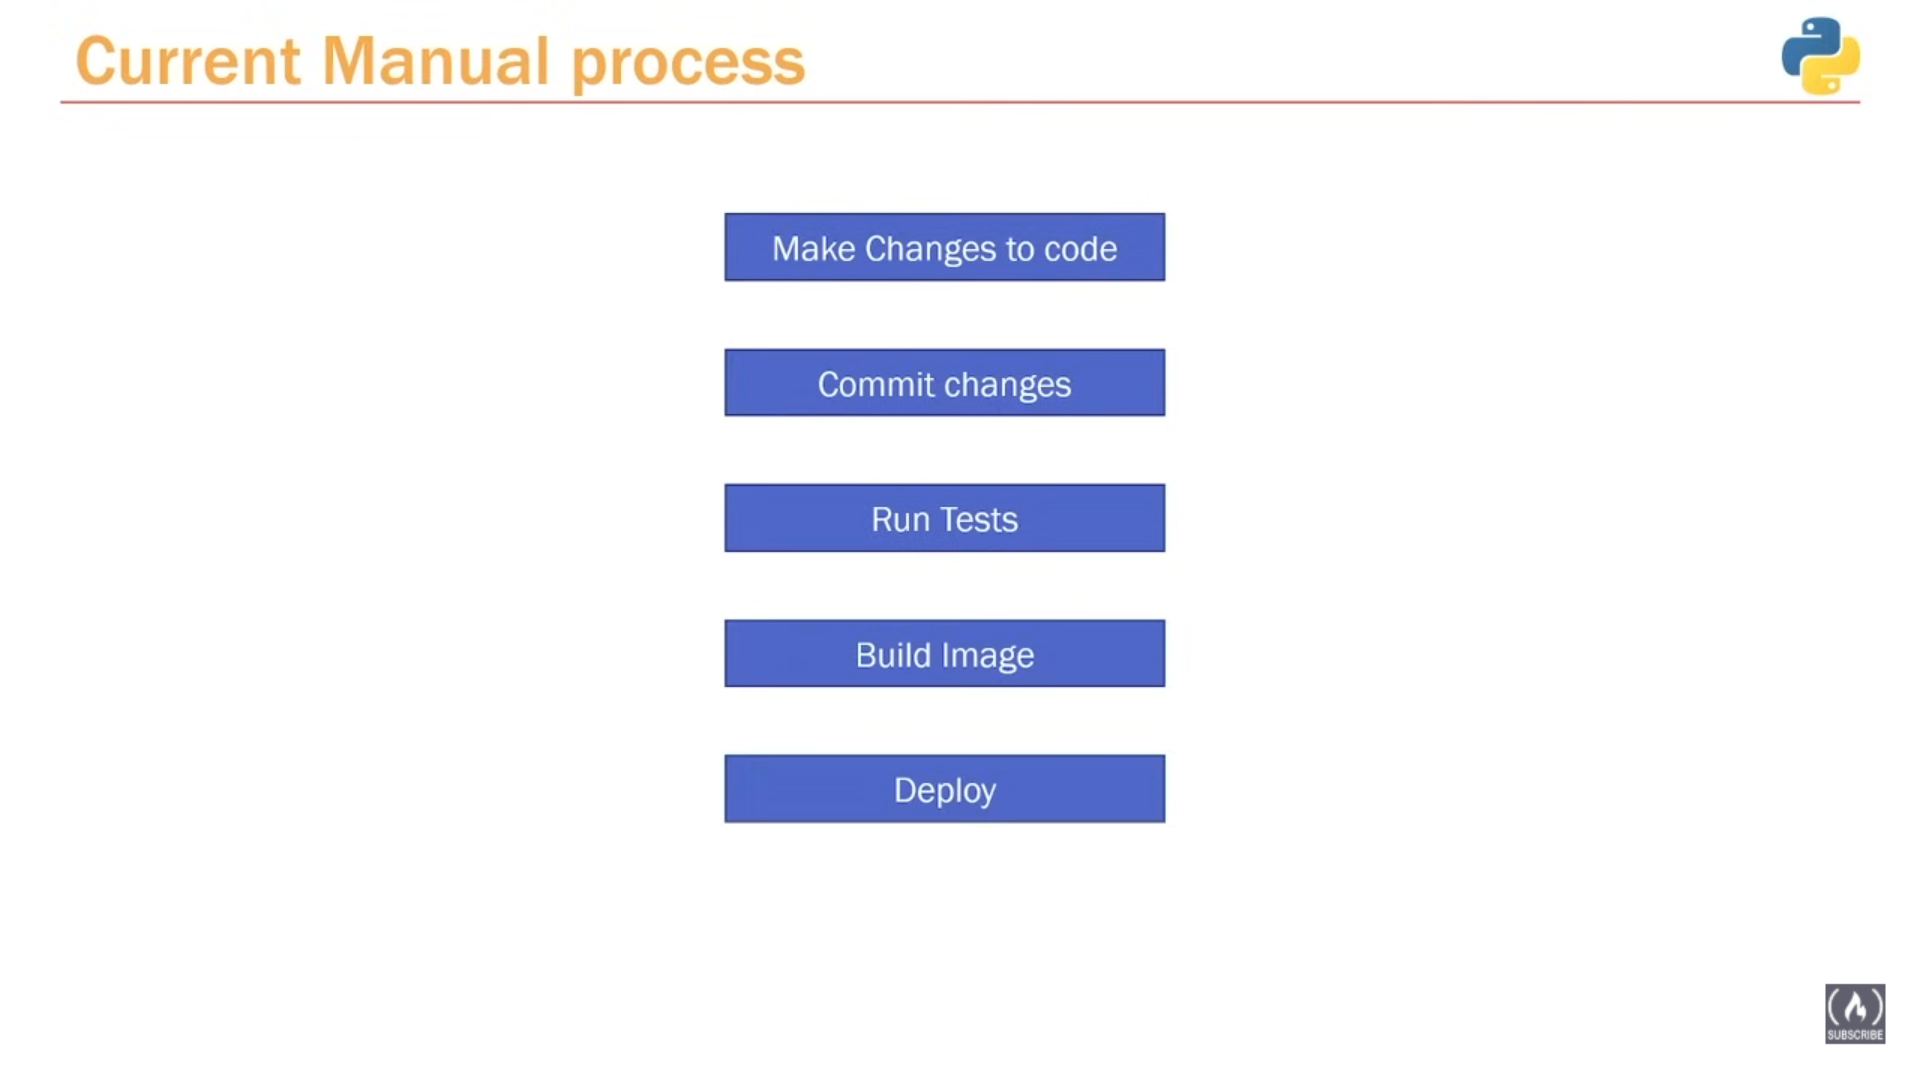
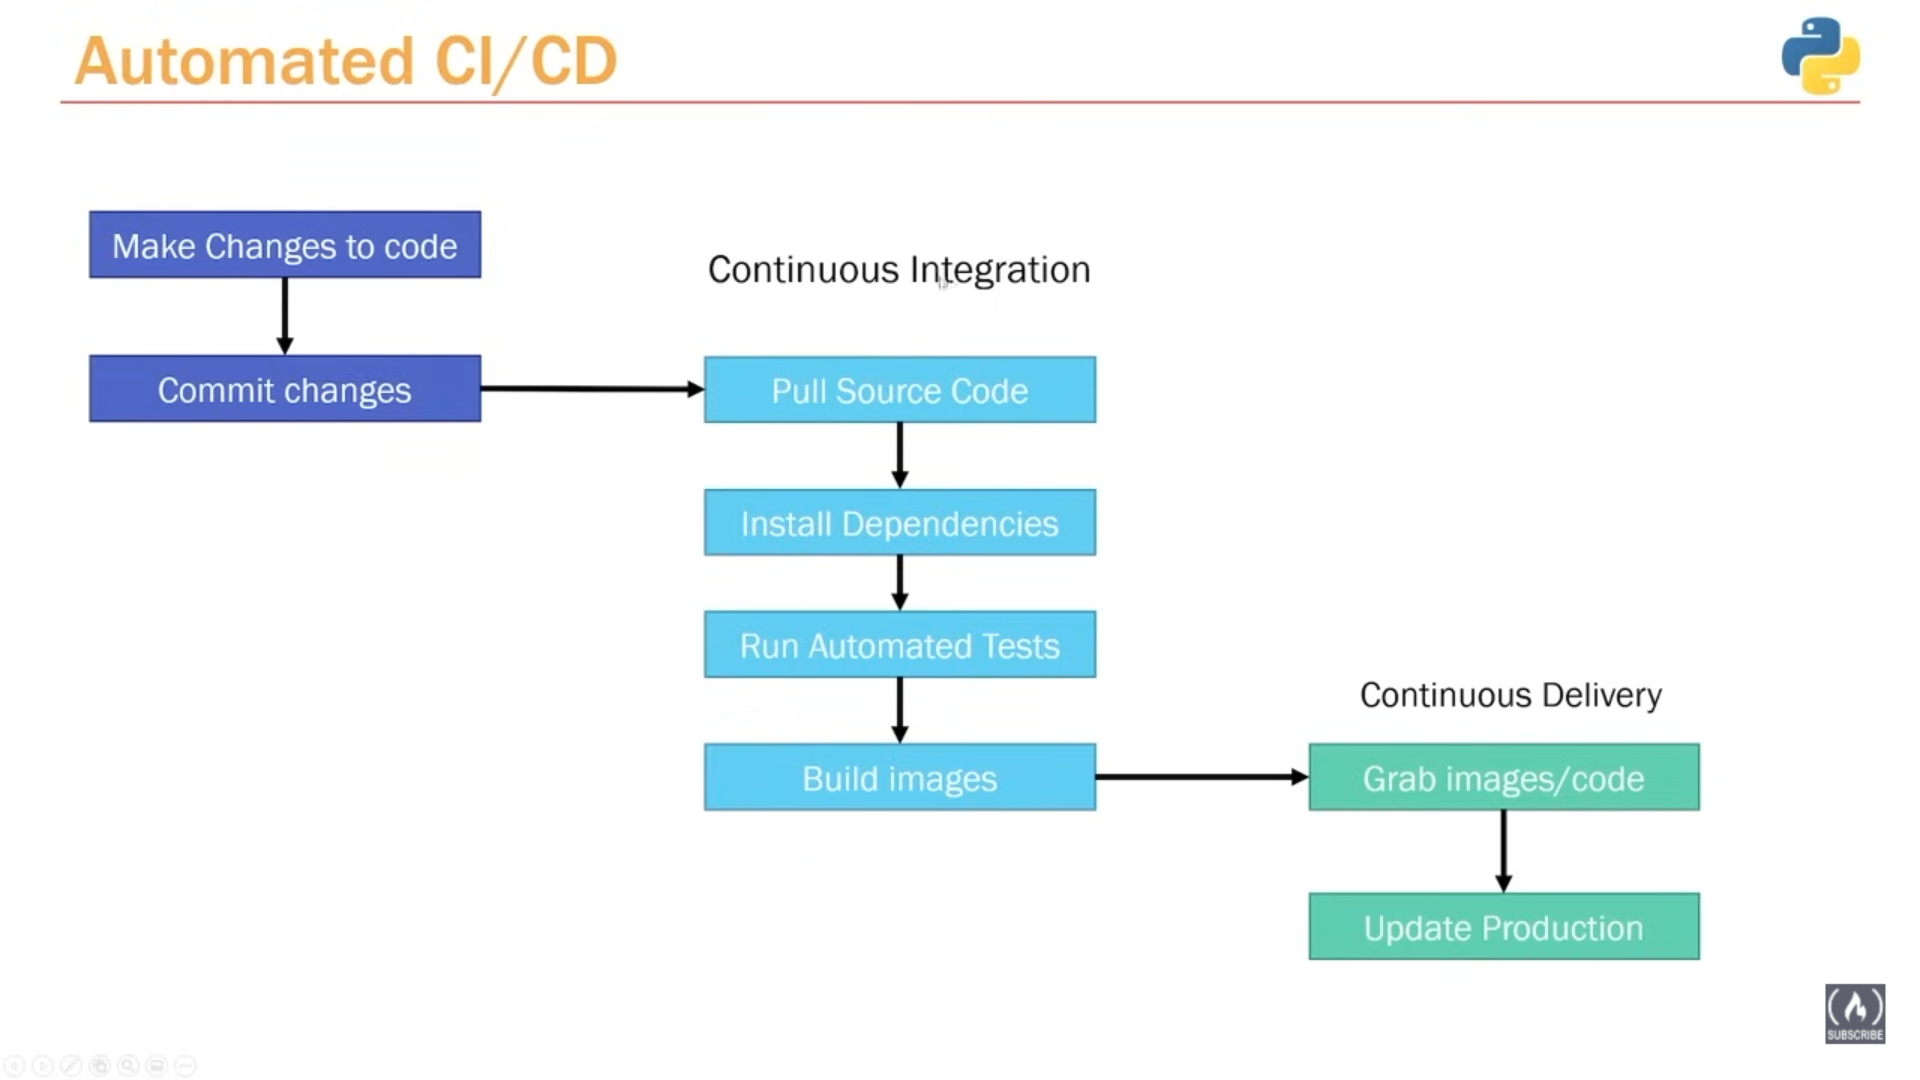


### Key Benefits:

* **Speed:** Release faster and more frequently.
* **Reliability:** Catch bugs early through automated testing.
* **Security:** Embed DevSecOps tools to scan code and infrastructure.

---

## Core CI/CD Best Practices

### Development & Workflow

* **Commit Early and Often:** Small commits enable fast feedback.
* **Build Once, Promote Everywhere:** Ensure consistent artifacts across environments.
* **Shared Pipelines:** Use templates or version-controlled pipeline YAMLs.

### Testing & Quality

* **Automate Testing:** Include unit, integration, and end-to-end tests.
* **Fail Fast:** Run critical tests early.
* **Parallel Execution:** Use matrix builds for speed (e.g., test multiple Python versions).

### Security & Observability

* **Shift Left Security:** Include checks like Trivy, Snyk, or GitLeaks early in pipeline.
* **Pipeline Monitoring:** Use Prometheus/Grafana or Datadog for tracking failures and timing.

### Infrastructure & Deployment

* **IaC (Infrastructure as Code):** Use Terraform or Ansible.
* **Progressive Delivery:** Implement canary or blue/green deployments.

---

## Top CI/CD Tools

| Tool         | Key Features                              | Ideal Use Case                         |
| ------------ | ----------------------------------------- | -------------------------------------- |
| Jenkins      | Open-source, plugin-rich                  | Self-hosted, custom pipelines          |
| GitLab CI/CD | Built-in with GitLab                      | GitLab-based full DevOps workflow      |
| CircleCI     | Fast, parallel testing, Docker support    | Cloud-native microservices pipelines   |
| ArgoCD       | GitOps-driven Kubernetes deployment       | Declarative Kubernetes environments    |
| Spinnaker    | Multi-cloud deployment, advanced rollouts | Enterprise-grade deployment automation |

---

## Code Examples and Pipeline Templates

### GitLab CI/CD Example (`.gitlab-ci.yml`)

```yaml
default:
  image: python:3.10

stages:
  - test
  - build
  - deploy

test:
  stage: test
  script:
    - pip install -r requirements.txt
    - pytest

build:
  stage: build
  script:
    - docker build -t myapp:${CI_COMMIT_SHORT_SHA} .
    - docker push myregistry/myapp:${CI_COMMIT_SHORT_SHA}

deploy:
  stage: deploy
  script:
    - kubectl apply -f k8s/deployment.yaml
  only:
    - main
```

### GitHub Actions Example (`.github/workflows/deploy.yml`)

```yaml
name: CI/CD Pipeline

on:
  push:
    branches: [main]

jobs:
  build-and-deploy:
    runs-on: ubuntu-latest

    steps:
    - uses: actions/checkout@v3
    - name: Set up Python
      uses: actions/setup-python@v4
      with:
        python-version: '3.10'
    - run: pip install -r requirements.txt
    - run: pytest
    - name: Build and push Docker
      run: |
        docker build -t myrepo/app:${{ github.sha }} .
        echo ${{ secrets.DOCKER_PASSWORD }} | docker login -u ${{ secrets.DOCKER_USER }} --password-stdin
        docker push myrepo/app:${{ github.sha }}
```

---

## Challenges and Solutions

| Challenge       | Solution                                       |
| --------------- | ---------------------------------------------- |
| Legacy Systems  | Containerize apps, modernize gradually         |
| Flaky Tests     | Use Docker for reproducible environments       |
| Scale Limits    | Add agents (e.g., Jenkins), cache dependencies |
| Manual Approval | Implement manual gates in CI/CD tools          |

---

## Case Study: E-Commerce Platform

A retail company adopted GitLab CI/CD and ArgoCD to deploy over 100 microservices to Kubernetes:

**Key Enhancements:**

* Added automated unit/integration tests to every service.
* Used Trivy and Snyk for vulnerability scanning.
* Implemented blue/green and canary deployments using Argo Rollouts.
* Enabled Slack notifications on pipeline status.

**Outcome:**

* 50% reduction in deployment time.
* Increased release frequency by 4x.
* Eliminated manual errors in staging/production.

---

## Key Takeaways

* **Start Small:** Begin with one service or team.
* **Choose Tools That Match Your Stack:** E.g., GitHub Actions for GitHub repos.
* **Automate Everything:** From code quality to deployments.
* **Monitor Pipelines:** Visibility is key for reliability.
* **Secure by Default:** DevSecOps must be baked into your pipelines.

---

For further reading:

* [GitLab CI/CD Docs](https://docs.gitlab.com/ee/ci/)
* [ArgoCD Docs](https://argo-cd.readthedocs.io/)
* [Red Hat OpenShift Pipelines](https://docs.openshift.com/pipelines/)


# Jenkins CI/CD from Installation to Deployment



This article covers everything you need to get started with Jenkins, from installing it on a host system to automating your entire CI/CD pipeline integrated with GitHub and Docker. You'll also learn about Jenkins architecture, infrastructure, and key features that make it a powerful automation server.

---

## Table of Contents

1. [Install Java and Jenkins](#install-java-and-jenkins)
2. [Start and Access Jenkins](#start-and-access-jenkins)
3. [Jenkins Initial Setup](#jenkins-initial-setup)
4. [Jenkins Architecture and Features](#jenkins-architecture-and-features)
5. [Integrating GitHub](#integrating-github)
6. [Creating a Jenkins Pipeline](#creating-a-jenkins-pipeline)
7. [Dockerizing Builds](#dockerizing-builds)
8. [Deploying with Jenkins](#deploying-with-jenkins)
9. [Security and Best Practices](#security-and-best-practices)
10. [Troubleshooting](#troubleshooting)
11. [Summary](#summary)

---

## Install Java and Jenkins

### Step 1: Install Java (JDK)

Jenkins recommends Java 11 or 17 (LTS versions). Run the following:

**Option 1: Install OpenJDK 17 (Recommended)**

```bash
sudo apt update && sudo apt install openjdk-17-jdk -y
```

**Option 2: Install OpenJDK 11 (Alternative)**

```bash
sudo apt update && sudo apt install openjdk-11-jdk -y
```

**Verify Java Installation**

```bash
java -version
```

Expected output:

```
openjdk version "17.0.10" 2024-01-16
OpenJDK Runtime Environment (build 17.0.10+7-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.10+7-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
```

### Step 2: Install Jenkins

Now that Java is installed, proceed with Jenkins setup:

**1. Add Jenkins Repository Key**

```bash
curl -fsSL https://pkg.jenkins.io/debian-stable/jenkins.io-2023.key | sudo tee \
  /usr/share/keyrings/jenkins-keyring.asc > /dev/null
```

**2. Add Jenkins Repository**

```bash
echo deb [signed-by=/usr/share/keyrings/jenkins-keyring.asc] \
  https://pkg.jenkins.io/debian-stable binary/ | sudo tee \
  /etc/apt/sources.list.d/jenkins.list > /dev/null
```

**3. Update & Install Jenkins**

```bash
sudo apt update && sudo apt install jenkins -y
```

---

## Start and Access Jenkins

**Start Jenkins:**

```bash
sudo systemctl start jenkins
sudo systemctl enable jenkins  # Enable auto-start on boot
```

**Check Status:**

```bash
sudo systemctl status jenkins
```

If active (running), Jenkins is installed correctly.

### Step 4: Access Jenkins

Open a browser and go to:

```
http://localhost:8080
```

(If accessing remotely, use `http://<your-server-IP>:8080`).

Unlock Jenkins with the initial admin password:

```bash
sudo cat /var/lib/jenkins/secrets/initialAdminPassword
```

Follow the setup wizard (install suggested plugins and create an admin user).

---

## Jenkins Initial Setup

After accessing the Jenkins dashboard, install the recommended plugins and create your first admin user.

Ensure these plugins are installed:

* GitHub Integration
* Docker
* Pipeline
* Blue Ocean (optional UI)

---

## Jenkins Architecture and Features

### Jenkins Infrastructure Overview

* **Master/Controller**: Orchestrates jobs, manages UI, configuration, and scheduling.
* **Agents/Nodes**: Remote machines that run jobs. Agents can be static or ephemeral (e.g., Docker/Kubernetes).
* **Executor**: A computational slot in a node where a build runs.
* **Workspaces**: Each job gets its own workspace on the agent.

### Jenkins Architecture Diagram

```
+-----------------------+             +--------------------------+
| Jenkins Controller    |  ----->     |   Jenkins Agent (Node)   |
| - UI & Config         |             |   - Executor             |
| - Schedule Jobs       |             |   - Workspace            |
+-----------------------+             +--------------------------+
         |                                  |
         +---> Triggers (e.g., GitHub Webhook)
         +---> Stores Logs, Artifacts, Results
```

### Key Features

* **Freestyle Projects**: Simple jobs using UI-configured steps.
* **Pipeline as Code**: Use `Jenkinsfile` to define multi-stage pipelines in Git.
* **Plugins Ecosystem**: 1,800+ plugins (e.g., Slack, Docker, GitHub, Kubernetes).
* **Integration with SCM**: Git, GitHub, GitLab, Bitbucket.
* **Declarative and Scripted Pipelines**.
* **Extensibility**: Custom shared libraries for code reuse.
* **Security**: Matrix-based auth, credential store, audit logs.

---

## Integrating GitHub

To connect Jenkins with GitHub:

1. Go to **Manage Jenkins > Configure System**.
2. Under **GitHub**, add your GitHub credentials.
3. Generate a GitHub personal access token (with `repo` and `workflow` scopes).
4. Install `GitHub Branch Source` plugin.
5. Add a new item (multibranch pipeline) and set the GitHub repo.

---

## Creating a Jenkins Pipeline

You can define a pipeline using a `Jenkinsfile` in your repository root.

```groovy
pipeline {
  agent any

  stages {
    stage('Clone') {
      steps {
        git 'https://github.com/your-org/your-repo.git'
      }
    }

    stage('Build') {
      steps {
        sh './build.sh'
      }
    }

    stage('Test') {
      steps {
        sh './run_tests.sh'
      }
    }

    stage('Deploy') {
      steps {
        sh './deploy.sh'
      }
    }
  }
}
```

---

## Dockerizing Builds

If your app builds or tests in a Docker container:

```groovy
pipeline {
  agent {
    docker { image 'node:20-alpine' }
  }
  stages {
    stage('Test') {
      steps {
        sh 'npm install && npm test'
      }
    }
  }
}
```

---

## Deploying with Jenkins

You can deploy to various environments:

**SSH to VM:**

```groovy
sh 'scp app.war user@host:/opt/tomcat/webapps/'
```

**To Kubernetes (kubectl must be configured):**

```groovy
sh 'kubectl apply -f k8s/deployment.yaml'
```

---

## Security and Best Practices

* Use encrypted credentials in Jenkins.
* Isolate jobs with Docker or agents.
* Audit user actions with Role Strategy Plugin.
* Rotate credentials and tokens periodically.
* Backup Jenkins config and job definitions.

---

## Troubleshooting

**Port 8080 in use?**
Change Jenkins port in `/etc/default/jenkins`:

```bash
sudo nano /etc/default/jenkins
```

Set:

```
HTTP_PORT=9090
```

Then restart:

```bash
sudo systemctl restart jenkins
```

**Firewall blocking access?**

```bash
sudo ufw allow 8080
```

---

## Summary

✅ Installed Java 17 (or 11).

✅ Added Jenkins repository and installed Jenkins.

✅ Started Jenkins, accessed it via web UI, and completed setup.

✅ Integrated GitHub and defined Jenkinsfile for CI/CD.

✅ Used Docker and deployed to production environments.

✅ Understood Jenkins architecture and infrastructure.

Let me know if you'd like to integrate Slack, Trivy scans, or ArgoCD next! 🚀


# 🛠️ Best Practices for Jenkins CI/CD in Docker-Based Microservices



As software systems scale into distributed microservices, maintaining efficient, automated CI/CD pipelines becomes crucial. Jenkins, a popular automation server, is a go-to choice — especially when integrated with Docker.

This guide walks through:

1. ✅ Whether to install Jenkins locally or via Docker
2. ✅ Best practices for using Jenkins in a Dockerized microservices architecture
3. ✅ How to configure GitHub webhooks to trigger Jenkins builds correctly

---

## 🔹 Part 1: Should You Install Jenkins Locally or via Docker?

### 🔥 Best Practice: Use Jenkins in Docker

Running Jenkins in Docker is now considered best practice, especially when working with containerized microservices.

| Factor                   | Jenkins Local Install ❌ | Jenkins via Docker ✅             |
| ------------------------ | ----------------------- | -------------------------------- |
| Portability              | OS-bound                | Easily moved across machines     |
| Isolation                | Mixed with host system  | Fully containerized              |
| Setup Time               | Longer                  | Fast (`docker run` or `compose`) |
| Docker Support           | Harder to configure     | Native via Docker socket         |
| Cleanup                  | Manual                  | Easy (`docker rm`)               |
| CI/CD with Docker Images | Tricky                  | Seamless integration             |

### ✅ Quick Start with Docker

```bash
docker volume create jenkins_home

docker run -d --name jenkins \
  -p 8080:8080 -p 50000:50000 \
  -v jenkins_home:/var/jenkins_home \
  -v /var/run/docker.sock:/var/run/docker.sock \
  jenkins/jenkins:lts
```

Or use `docker-compose.yml`:

```yaml
version: '3.8'
services:
  jenkins:
    image: jenkins/jenkins:lts
    ports:
      - "8080:8080"
      - "50000:50000"
    volumes:
      - jenkins_home:/var/jenkins_home
      - /var/run/docker.sock:/var/run/docker.sock
    restart: unless-stopped
volumes:
  jenkins_home:
```

---

## 🔹 Part 2: Jenkins CI/CD Best Practices for Microservices

Each microservice should ideally be independently buildable and testable. Jenkins pipelines for Dockerized services should follow this structure:

### ✅ 1. One Jenkinsfile per Microservice

Each service should contain:

* `Dockerfile`
* `Jenkinsfile`
* Unit/integration tests

### ✅ 2. Use Declarative Pipelines

Example:

```groovy
pipeline {
    agent any
    stages {
        stage('Build Docker') {
            steps {
                script {
                    docker.build("my-service:${env.BUILD_NUMBER}")
                }
            }
        }
        stage('Test') {
            steps {
                sh 'pytest tests/'
            }
        }
        stage('Push') {
            steps {
                withCredentials([usernamePassword(credentialsId: 'dockerhub', ...)]) {
                    sh 'docker login -u $USERNAME -p $PASSWORD'
                    sh "docker push my-service:${env.BUILD_NUMBER}"
                }
            }
        }
    }
}
```

### ✅ 3. Use Docker Agents for Build Isolation

```groovy
agent {
  docker {
    image 'python:3.9'
    args '-v /var/run/docker.sock:/var/run/docker.sock'
  }
}
```

### ✅ 4. Integrate `docker-compose` for Integration Testing

```bash
docker-compose -f docker-compose.test.yml up --build --abort-on-container-exit
```

Include this in Jenkins for system-level testing of service interactions.

### ✅ 5. Use GitHub Webhooks + Polling

Configure Jenkins to trigger on Git events with webhooks (see next section), or on schedules using:

```groovy
triggers {
    pollSCM('H/5 * * * *')  // every 5 mins
}
```

---

## 🔹 Part 3: Configure GitHub Webhook for Jenkins

Jenkins doesn't automatically connect to GitHub — you need to use webhooks.

### ⚠️ GitHub **cannot** reach `localhost:8080/github-webhook/` from the internet!

---

### ✅ Solution: Use **Ngrok** to Expose Jenkins

```bash
sudo snap install ngrok
ngrok http 8080
```

Ngrok gives you a public URL like:

```
https://abcd1234.ngrok.io
```

---

### 🔧 Set Up GitHub Webhook

1. Go to **GitHub Repo → Settings → Webhooks → Add Webhook**

2. Use:

   * **Payload URL**: `https://abcd1234.ngrok.io/github-webhook/`
   * **Content type**: `application/json`
   * **Events**: Just the push event
   * Leave **Active** checked

3. Save. Now Jenkins will build on every push!

---

## ✅ Summary

| Task                         | Recommendation                       |
| ---------------------------- | ------------------------------------ |
| Jenkins Install Method       | ✅ Use Docker for isolation & CI      |
| CI/CD Pipeline Structure     | ✅ Use `Dockerfile` + `Jenkinsfile`   |
| Trigger Builds Automatically | ✅ Use GitHub Webhooks + Ngrok        |
| Container Test Environment   | ✅ Use Docker Compose for integration |
| Image Publishing             | ✅ Use Docker Hub or private registry |
